In [1]:
# import packages
from astropy.io import fits
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from PIL import Image

from lmfit import Model, fit_report
from lmfit.models import LinearModel
from scipy.signal import argrelextrema

import os
notebook_path = os.path.abspath('h2_h3p_vel_compare.ipynb' + "/../")
imgpath = os.path.join(os.path.dirname(notebook_path), 'plots/vprf')

In [2]:
h2_vprf = fits.open('h2_vprf.fits', ignore_missing_end=True)[0].data
h3p_vprf = fits.open('h3p_vprf.fits', ignore_missing_end=True)[0].data
h2_verr = fits.open('h2_verr.fits', ignore_missing_end=True)[0].data
h3p_verr = fits.open('h3p_verr.fits', ignore_missing_end=True)[0].data
h2_int = fits.open('h2_int_shifted.fits', ignore_missing_end=True)[0].data
h3p_int = fits.open('h3p_int_shifted.fits', ignore_missing_end=True)[0].data
ref_sun = fits.open('ref_sun.fits', ignore_missing_end=True)[0].data

h2_vprf[h2_verr > 4] = np.nan
h3p_vprf[h3p_verr > 4] = np.nan

h2_vprf[h2_vprf > 4] = np.nan
h3p_vprf[h3p_vprf > 4] = np.nan
h2_vprf[h2_vprf < -4] = np.nan
h3p_vprf[h3p_vprf < -4] = np.nan

h2_vprf[:,:20] = np.nan
h3p_vprf[:,:20] = np.nan
h2_vprf[:,280:] = np.nan
h3p_vprf[:,280:] = np.nan

h2_verr[np.isnan(h2_vprf)] = np.nan
h3p_verr[np.isnan(h3p_vprf)] = np.nan
h2_int[np.isnan(h2_vprf)] = np.nan
h3p_int[np.isnan(h3p_vprf)] = np.nan

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


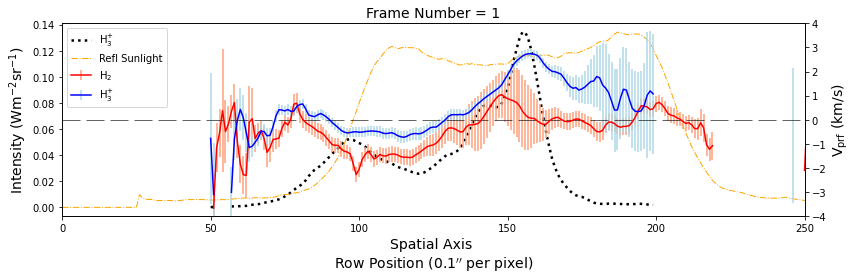

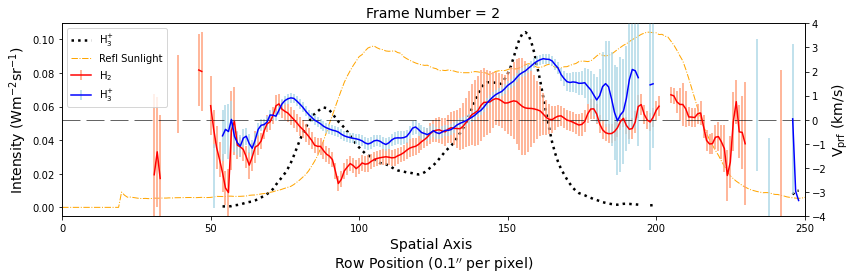

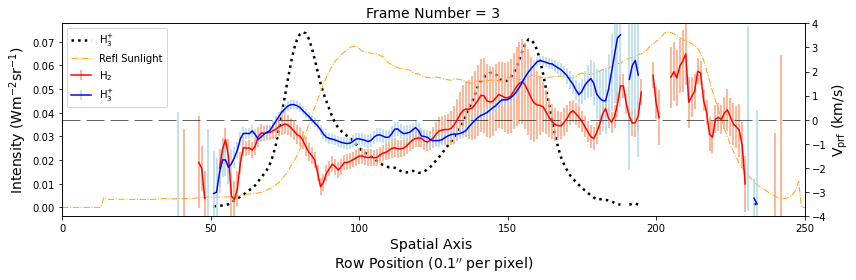

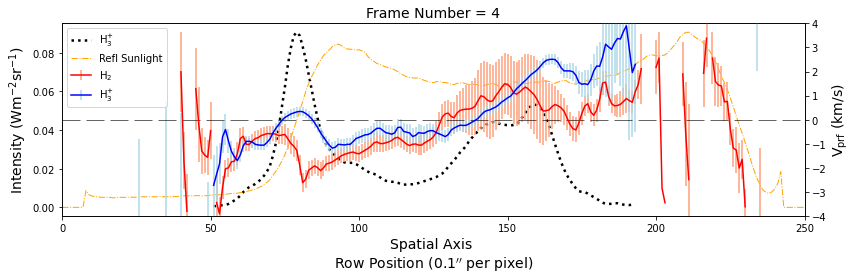

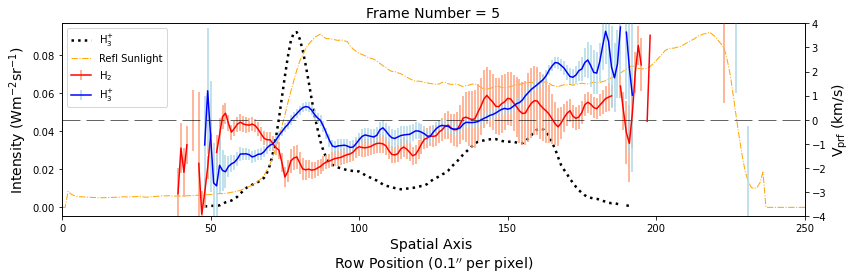

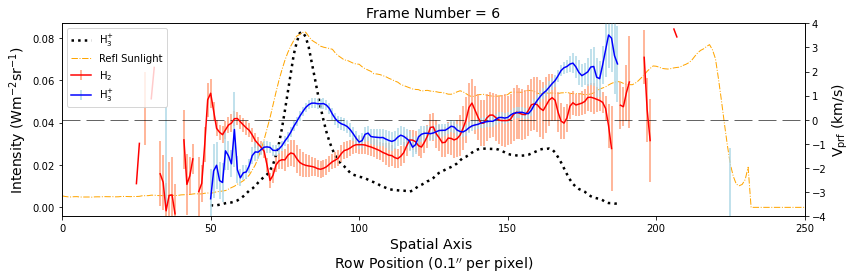

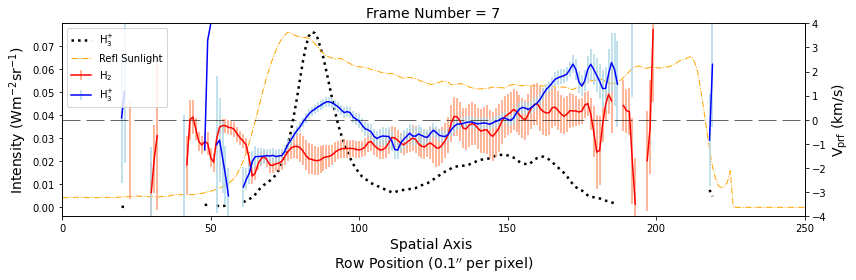

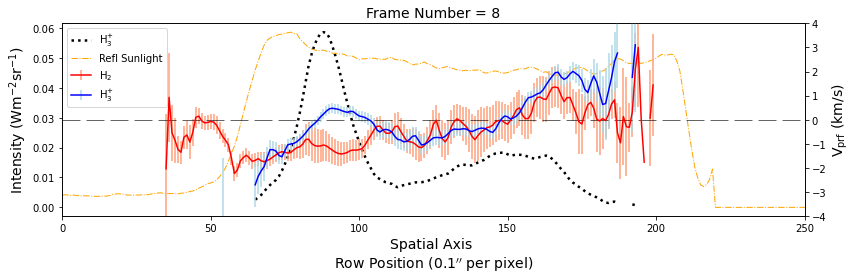

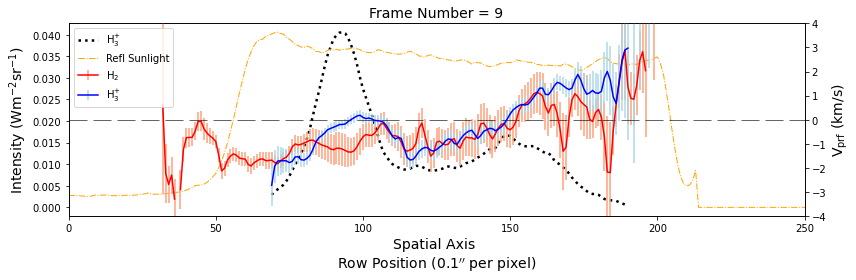

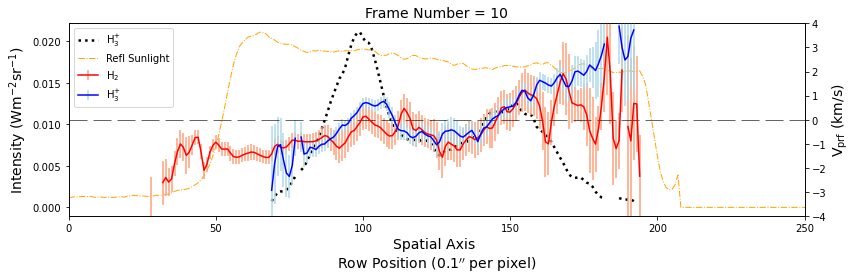

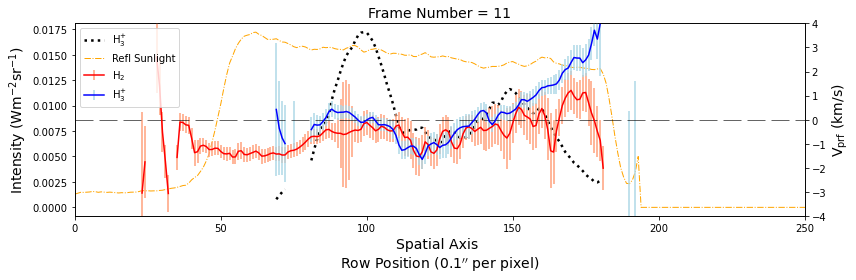

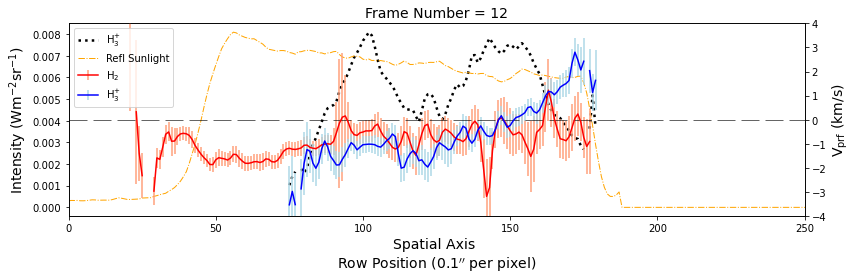

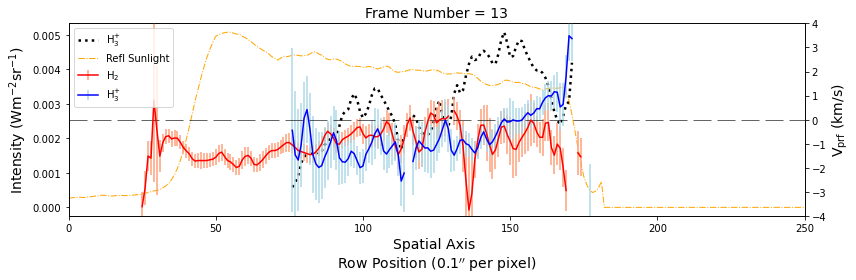

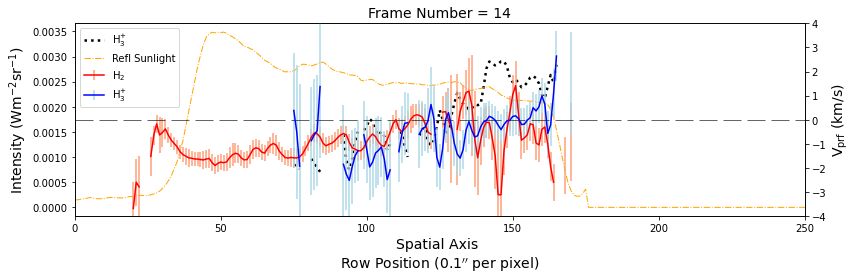

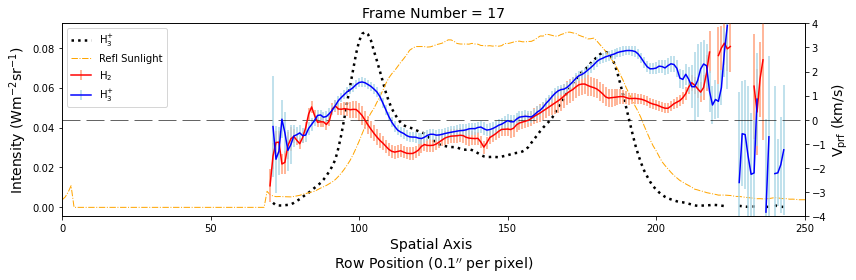

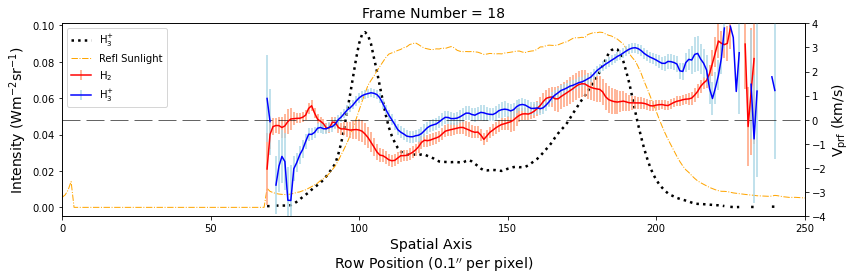

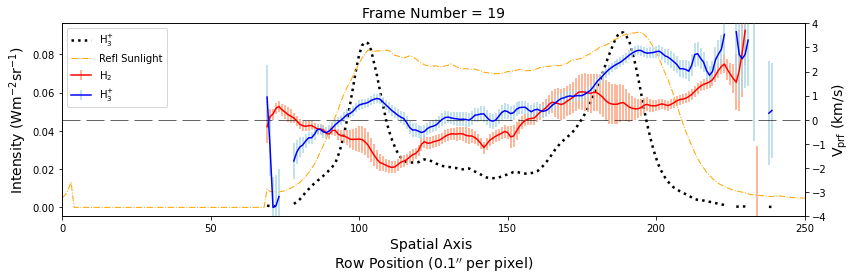

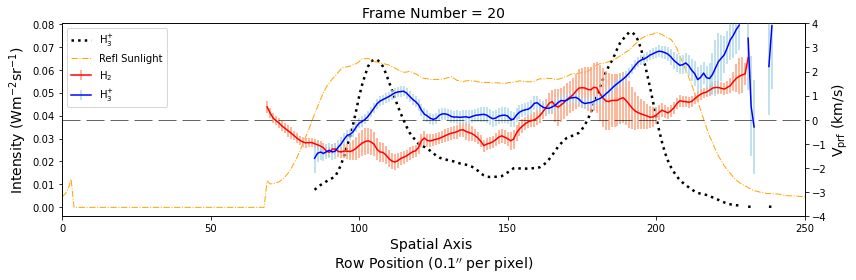

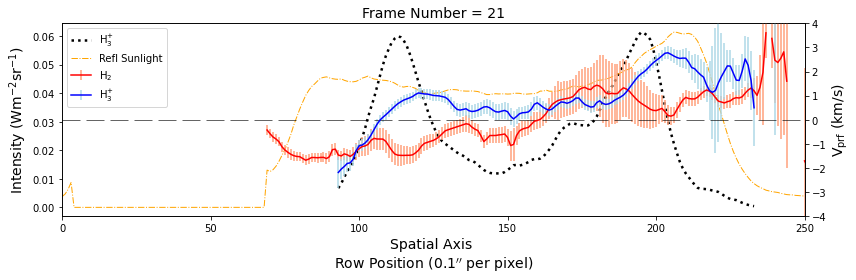

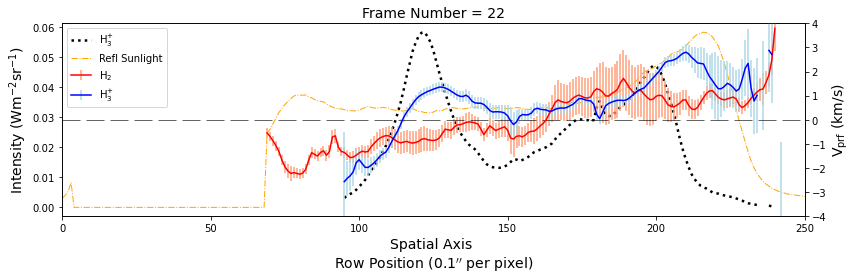

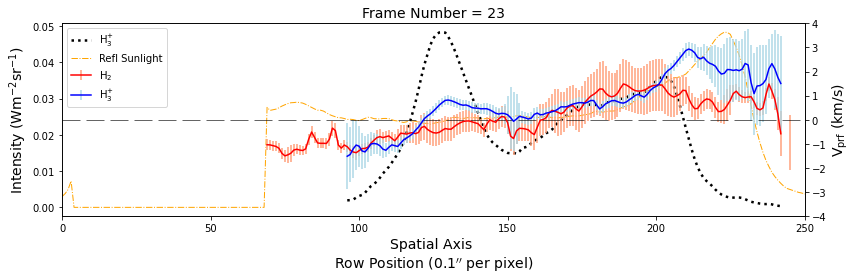

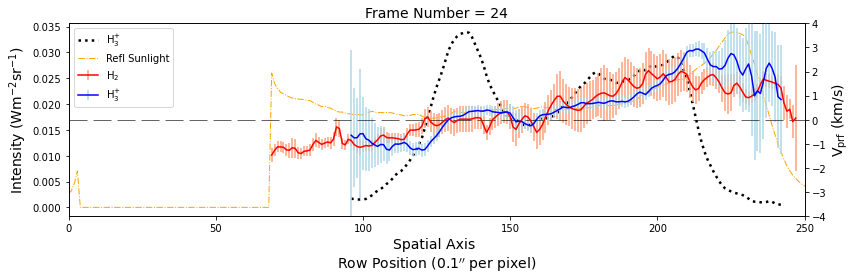

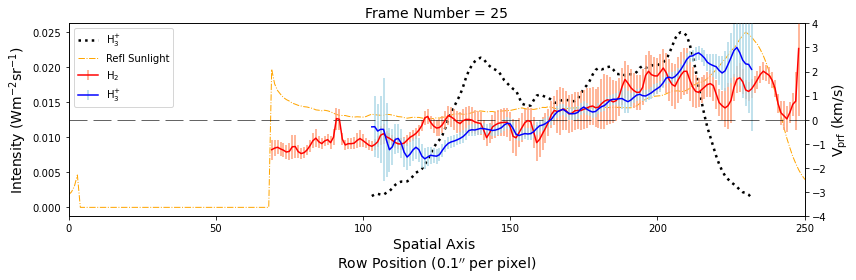

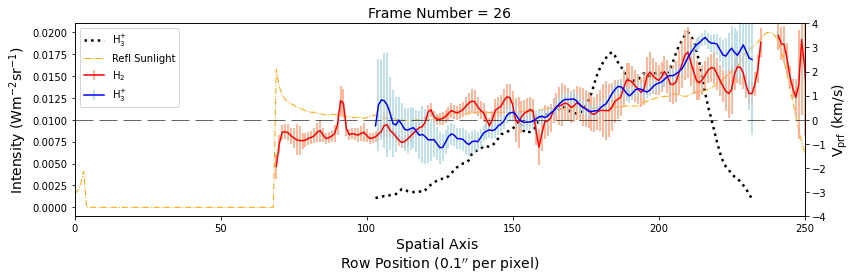

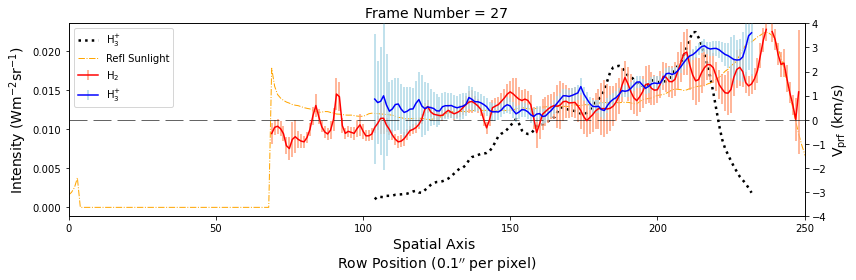

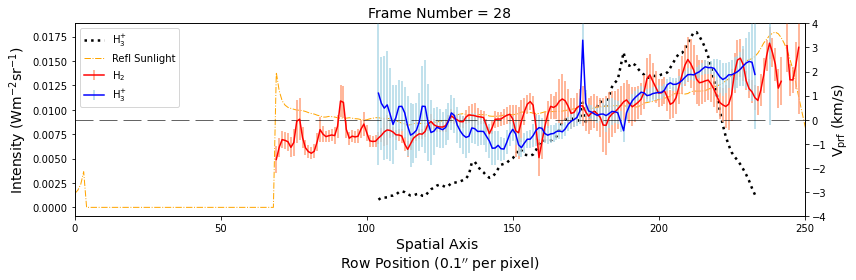

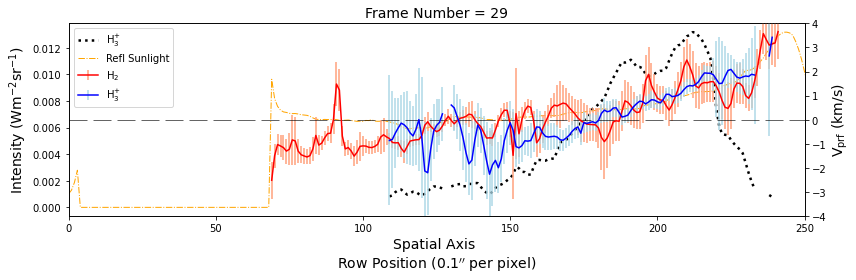

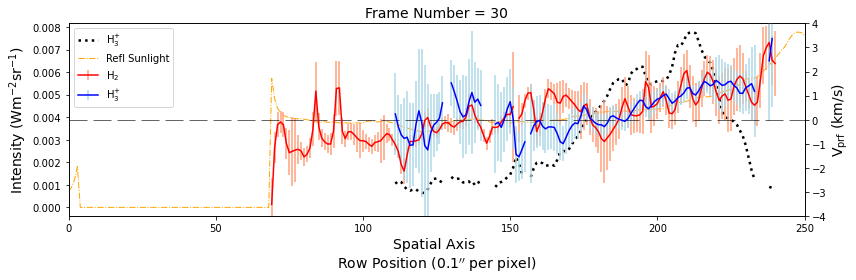

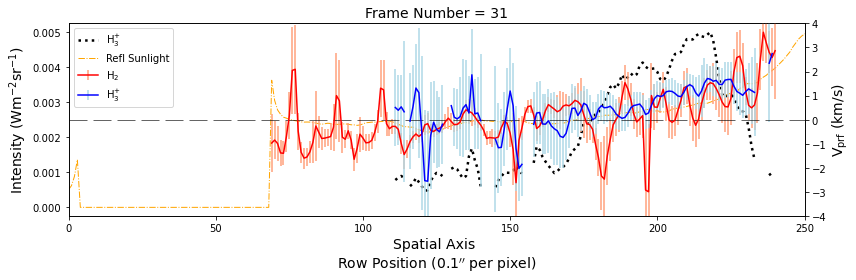

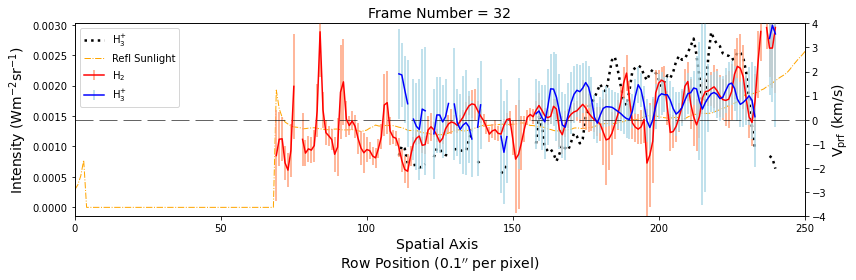

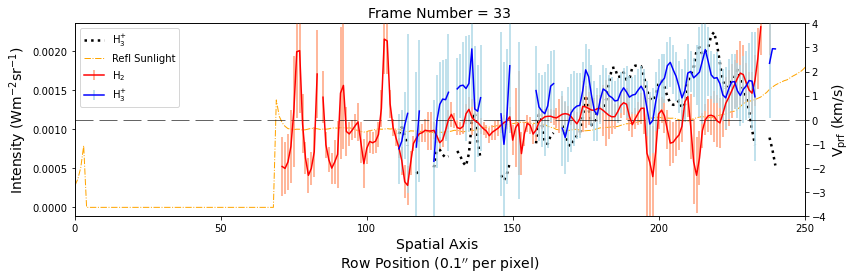

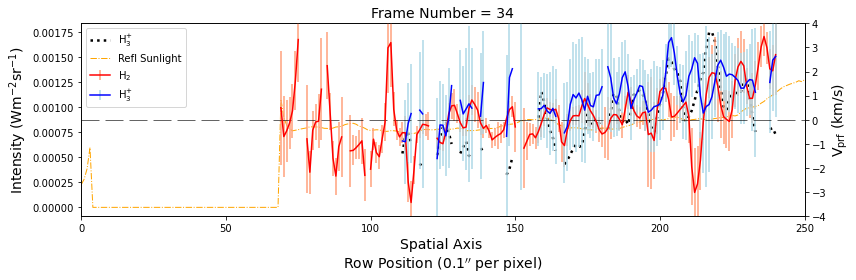

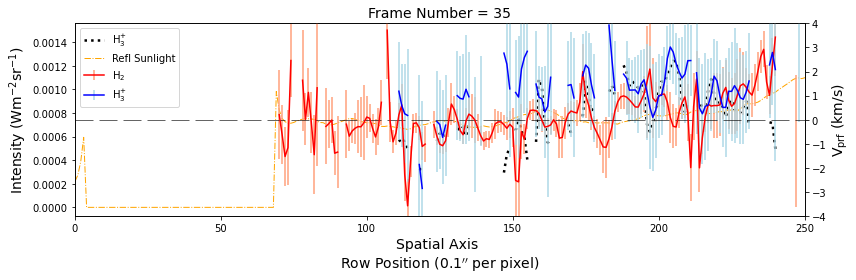

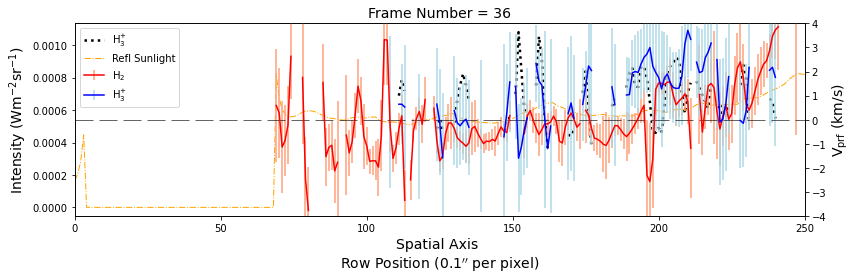

In [3]:
a2 = h2_vprf*(-1)
b2 = h3p_vprf*(-1)

c2 = b2 - a2
errc2 = np.sqrt((h3p_verr)**2 + (h2_verr)**2)

for i in range(len(h3p_vprf)):
# for i in range(2):
    if i not in (0,15,16,37):  
        xnew = np.linspace(0,299,300)
        int2 = (ref_sun/np.nanmax(ref_sun[i])*np.nanmax(h3p_int[i]))
        
        fig, ax = plt.subplots(figsize = (12, 4))
        plt.title('Frame Number = '+ str(i), fontsize=14)
        
        ax2 = ax.twinx()
        ax.plot(xnew, h3p_int[i], color='k', ls=':', label='H$_3^{+}$', lw=2.5)
        ax.plot(xnew, int2[i], color='orange', ls='-.', label='Refl Sunlight', lw=1)
        ax2.errorbar(xnew, a2[i], yerr=h2_verr[i], color='r', ecolor='lightsalmon', label='H$_2$')
        ax2.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='b', ecolor='lightblue', label='H$_3^{+}$')
#         ax2.errorbar(xnew, c2[i], yerr=errc2[i], color='green', ecolor='lightgreen', label='H$_3^{+}$-H$_2$')
        
        # giving labels to the axises
        ax.set_xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
        ax.set_ylabel('Intensity (Wm$^{-2}$sr$^{-1}$)', fontsize=14)

        # secondary y-axis label
        ax2.set_ylabel('V$_{\mathrm{prf}}$ (km/s)', fontsize=14)
        
#         plt.figure(figsize=(12,4))
#         plt.plot(a2[num], label='H2')
#         plt.plot(b2[num], label='H3+')
#         plt.plot(xnew, int2[i], color='teal', ls='-', label='H$_3^{+}$ - Int')
#         plt.errorbar(xnew, a2[i], yerr=h2_verr[i], color='red', ecolor='gray', label='H$_2$')
#         plt.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='blue', ecolor='lightblue', label='H$_3^{+}$')
        plt.axhline(y=0, xmin=0, xmax=250, color='black', ls='dashed', dashes=(30, 10), lw=0.6)
        plt.xlim(0,250)
        plt.ylim(-4,4)
#         plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
#         plt.ylabel('V$_{\mathrm{PRF}}$ (km/s)', fontsize=14)
        
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc=2)
        
        plt.tight_layout()
#         plt.savefig(imgpath + '/h2_h3p_int_vel_fr' +str(i), dpi=400, bbox_inches='tight', facecolor='white')

In [4]:
peak1 = np.zeros(38)
peak2 = np.zeros(38)

for i in range(len(h3p_int)):
    x = h3p_int[i]
    skip = [0,13,15,16,29,37]
    if i not in skip and i < 15:
        print('i = ' + str(i))
        print(argrelextrema(x[0:110], np.greater))
        print(argrelextrema(x[75:110], np.greater)[0][0]+75)
        peak1[i] = argrelextrema(x[75:110], np.greater)[0][0]+75
    if i == 13:
        print('i = ' + str(i))
        print(argrelextrema(x[0:110], np.greater))
        peak1[i] = 100
    if i not in skip and i > 14 and i < 24:
        print('i = ' + str(i))
        print(argrelextrema(x[0:160], np.greater))
        print(argrelextrema(x[90:160], np.greater)[0][0]+90)
        peak1[i] = argrelextrema(x[90:160], np.greater)[0][0]+90
    if i not in skip and i > 23 and i < 26:
        print('i = ' + str(i))
        print(argrelextrema(x[0:160], np.greater))
        print(argrelextrema(x[115:160], np.greater)[0][0]+115)
        peak1[i] = argrelextrema(x[115:160], np.greater)[0][0]+115
    if i not in skip and i > 25 and i < 29:
        print('i = ' + str(i))
        print(argrelextrema(x[0:200], np.greater))
        print(argrelextrema(x[180:200], np.greater)[0][0]+180)
        peak1[i] = argrelextrema(x[180:200], np.greater)[0][0]+180
    if i == 29:
        print('i = ' + str(i))
        print(argrelextrema(x[0:200], np.greater))
        peak1[i] = 190
    if i not in skip and i > 29 and i < 32:
        print('i = ' + str(i))
        print(argrelextrema(x[0:200], np.greater))
        print(argrelextrema(x[192:200], np.greater)[0][0]+192)
        peak1[i] = argrelextrema(x[192:200], np.greater)[0][0]+192
    if i not in skip and i > 31:
        peak1[i] = np.nan

peak1[peak1<1] = np.nan

for i in range(len(h3p_int)):
    y = h3p_int[i]
    skip = [0,15,16,37]
    if i not in skip and i < 9:
        print('i = ' + str(i))
        print(argrelextrema(y[0:200], np.greater))
        print(argrelextrema(y[151:200], np.greater)[0][0]+151)
        peak2[i] = argrelextrema(y[151:200], np.greater)[0][0]+151
    if i not in skip and i >= 9 and i < 15:
        print('i = ' + str(i))
        print(argrelextrema(y[0:200], np.greater))
        print(argrelextrema(y[145:180], np.greater)[0][0]+145)
        peak2[i] = argrelextrema(y[145:180], np.greater)[0][0]+145
    if i not in skip and i >= 15 and i < 24:
        print('i = ' + str(i))
        print(argrelextrema(y[0:240], np.greater))
        print(argrelextrema(y[181:220], np.greater)[0][0]+181)
        peak2[i] = argrelextrema(y[181:220], np.greater)[0][0]+181
    if i not in skip and i >= 24 and i < 30:
        print('i = ' + str(i))
        print(argrelextrema(y[0:240], np.greater))
        print(argrelextrema(y[200:240], np.greater)[0][0]+200)
        peak2[i] = argrelextrema(y[200:240], np.greater)[0][0]+200
    if i not in skip and i >= 30 and i < 32:
        print('i = ' + str(i))
        print(argrelextrema(y[0:240], np.greater))
        print(argrelextrema(y[211:240], np.greater)[0][0]+211)
        peak2[i] = argrelextrema(y[211:240], np.greater)[0][0]+211
    if i == 32:
        print('i = ' + str(i))
        print(argrelextrema(y[0:240], np.greater))
        peak2[i] = 216
    if i not in skip and i >= 33 and i < 35:
        print('i = ' + str(i))
        print(argrelextrema(y[0:240], np.greater))
        print(argrelextrema(y[214:240], np.greater)[0][0]+214)
        peak2[i] = argrelextrema(y[214:240], np.greater)[0][0]+214
    if i not in skip and i >= 35:
        peak2[i] = np.nan
    
peak2[peak2<1] = np.nan
peak2

peak1[26:] = np.nan
peak2[28:] = np.nan
peak1[11:16] = np.nan
peak2[10:16] = np.nan
peak1

# for i in range(len(h3p_int)):
#     y = h3p_int[i]
#     skip = [0,15,16,37]
#     if i not in skip and i >= 33 and i < 35:
#         print('i = ' + str(i))
#         print(argrelextrema(y[0:240], np.greater))
#         print(argrelextrema(y[214:240], np.greater)[0][0]+214)

i = 1
(array([97]),)
97
i = 2
(array([88]),)
88
i = 3
(array([81]),)
81
i = 4
(array([79, 98]),)
79
i = 5
(array([51, 79, 99]),)
79
i = 6
(array([81]),)
81
i = 7
(array([84]),)
84
i = 8
(array([88]),)
88
i = 9
(array([93]),)
93
i = 10
(array([72, 99]),)
99
i = 11
(array([99]),)
99
i = 12
(array([102]),)
102
i = 13
(array([ 82,  89,  97, 104]),)
i = 14
(array([101, 105]),)
101
i = 17
(array([102, 137, 145]),)
102
i = 18
(array([ 74, 102, 118, 122, 129, 132, 137, 145, 153]),)
102
i = 19
(array([102, 122, 137, 153]),)
102
i = 20
(array([106, 153]),)
106
i = 21
(array([113, 153]),)
113
i = 22
(array([122, 152]),)
122
i = 23
(array([128, 152]),)
128
i = 24
(array([ 97, 135, 152]),)
135
i = 25
(array([105, 113, 140]),)
140
i = 26
(array([106, 112, 118, 140, 152, 167, 184, 191, 195]),)
184
i = 27
(array([105, 118, 152, 160, 168, 187, 198]),)
187
i = 28
(array([112, 118, 125, 137, 152, 161, 169, 174, 180, 188, 191, 198]),)
188
i = 29
(array([113, 117, 125, 133, 136, 138, 152, 160, 188, 191]),)

array([ nan,  97.,  88.,  81.,  79.,  79.,  81.,  84.,  88.,  93.,  99.,
        nan,  nan,  nan,  nan,  nan,  nan, 102., 102., 102., 106., 113.,
       122., 128., 135., 140.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


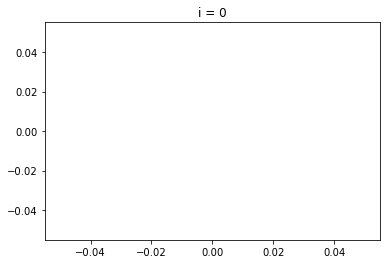

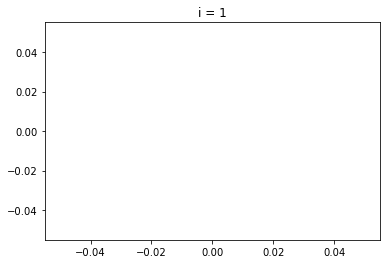

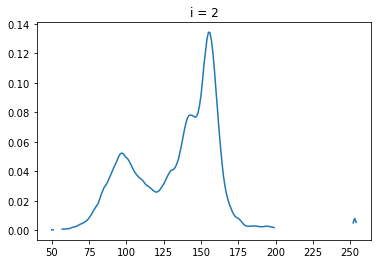

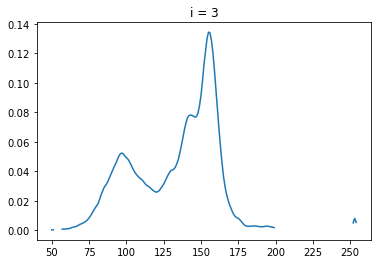

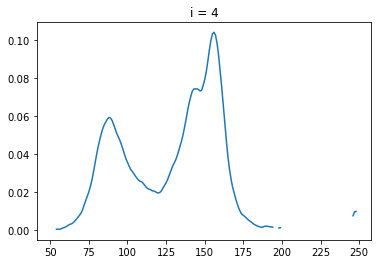

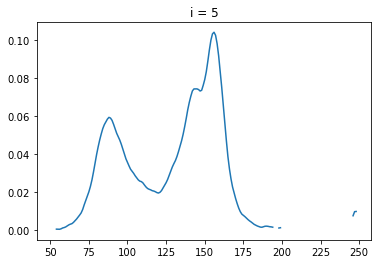

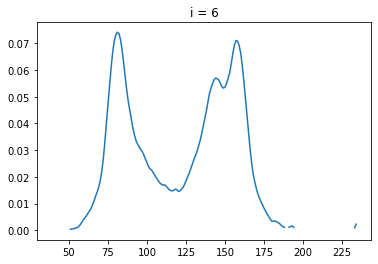

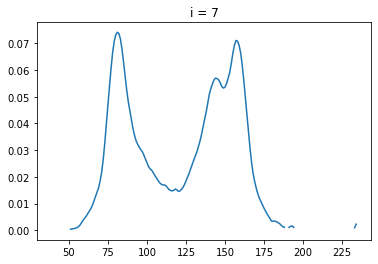

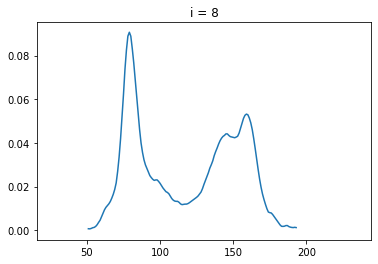

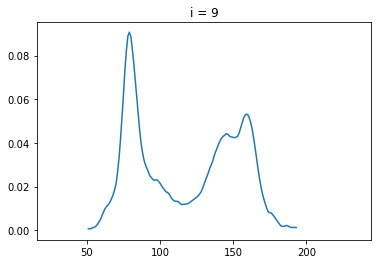

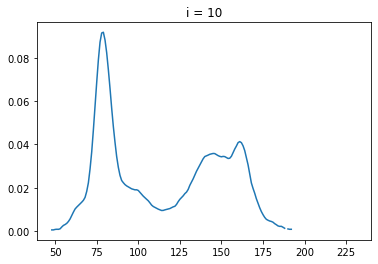

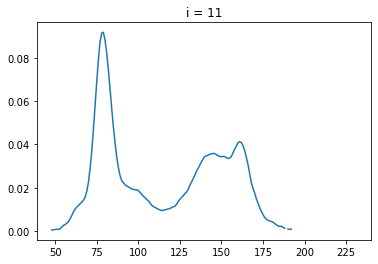

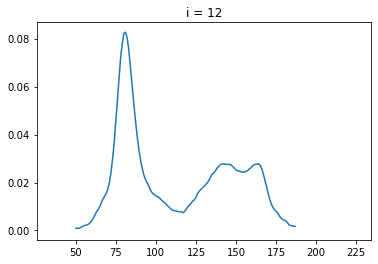

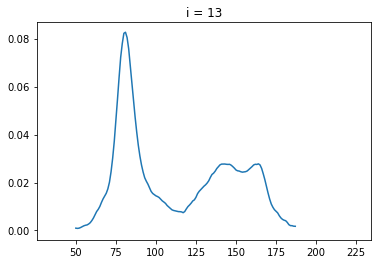

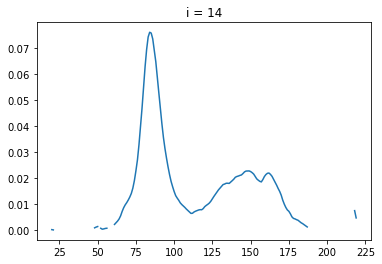

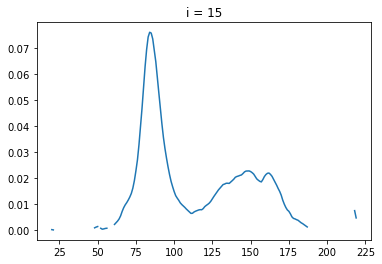

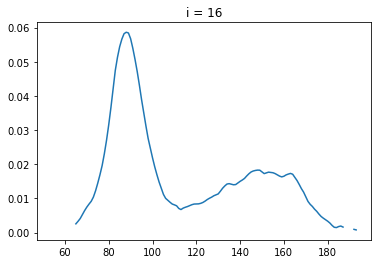

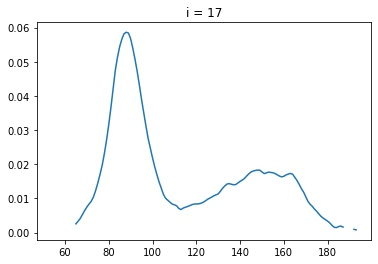

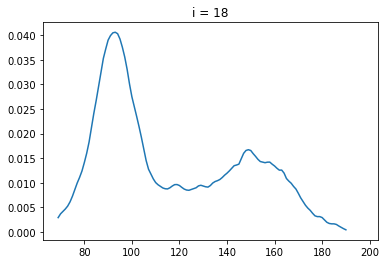

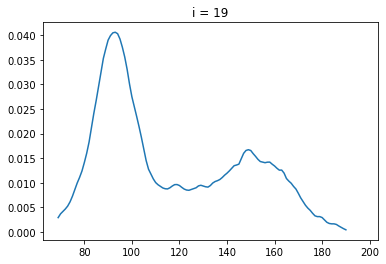

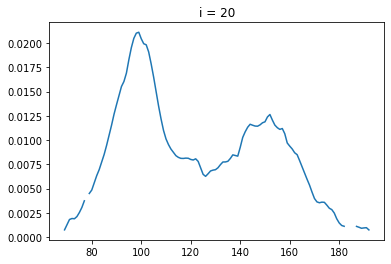

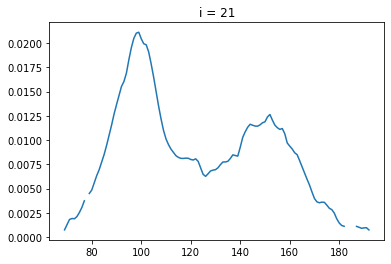

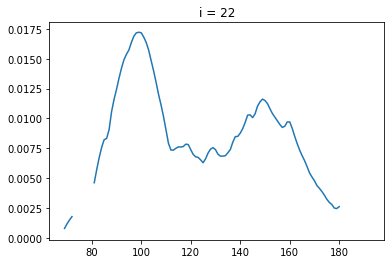

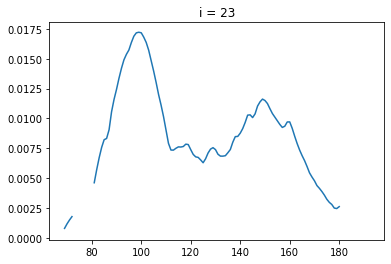

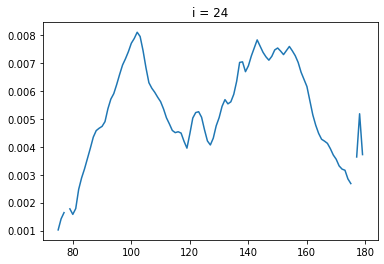

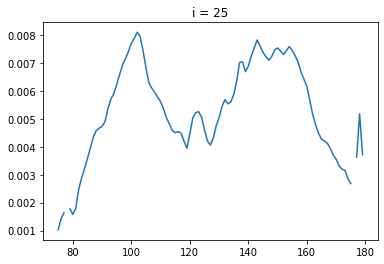

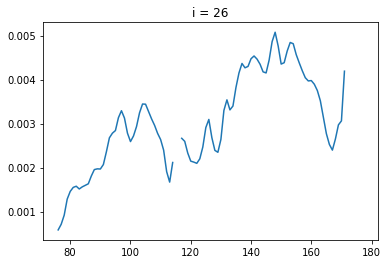

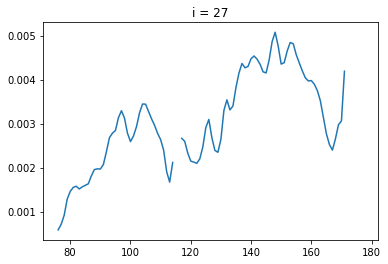

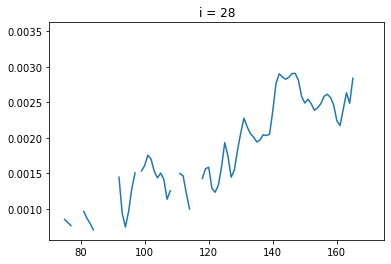

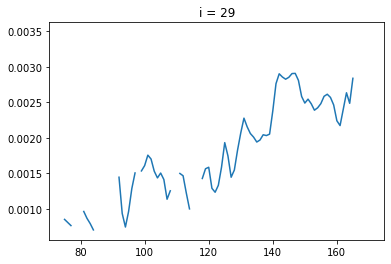

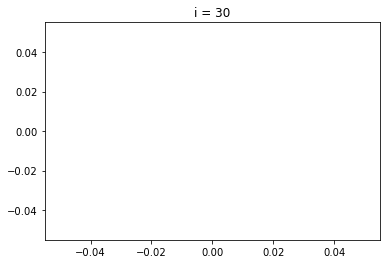

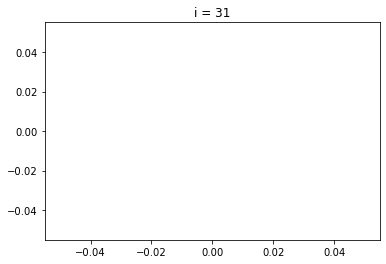

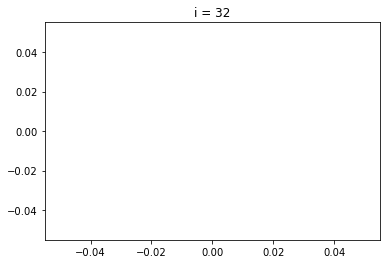

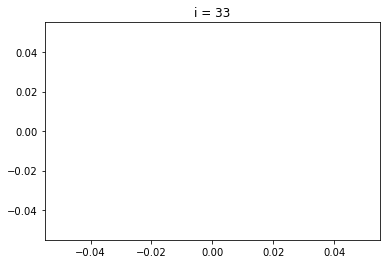

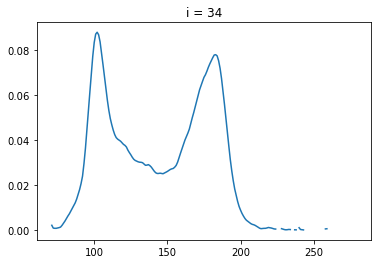

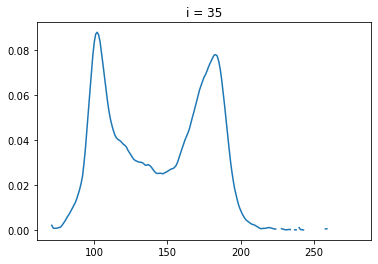

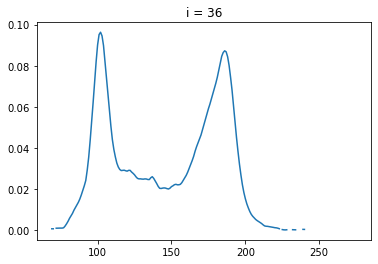

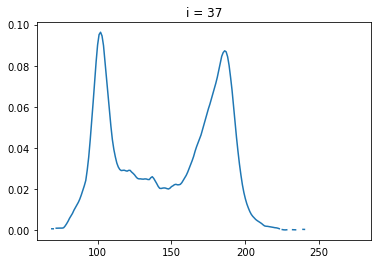

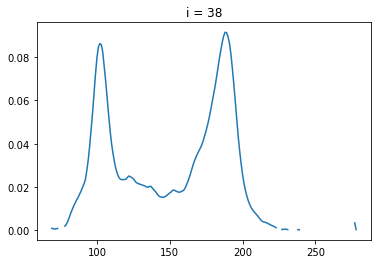

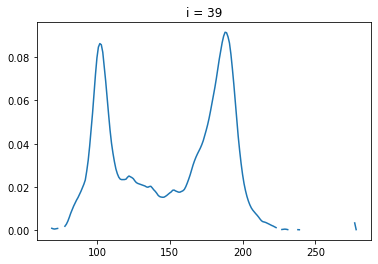

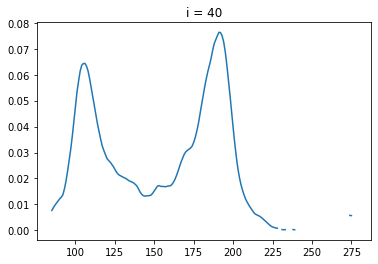

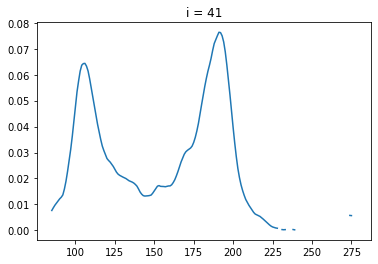

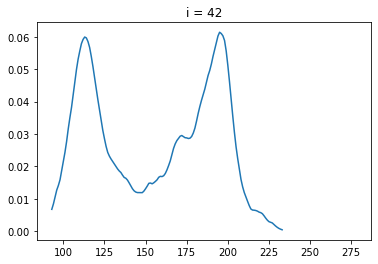

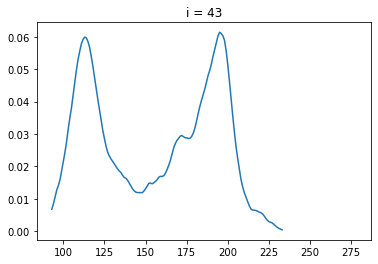

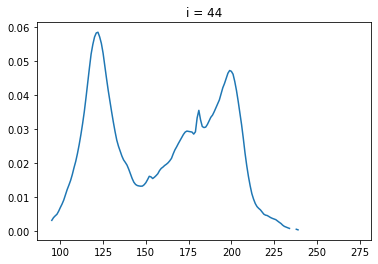

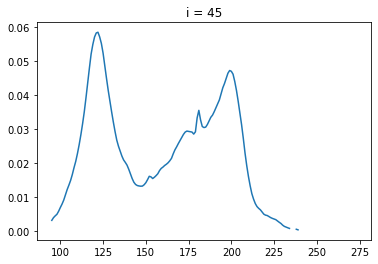

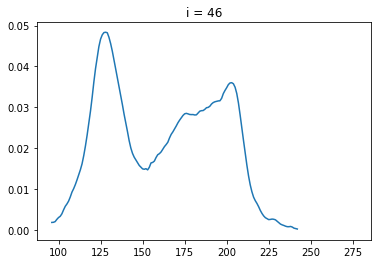

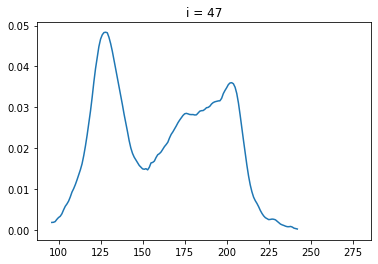

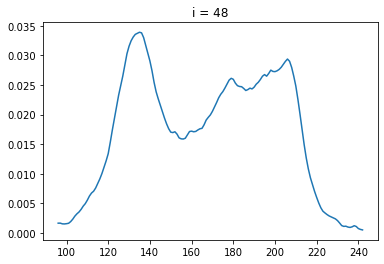

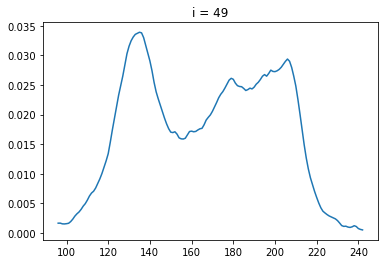

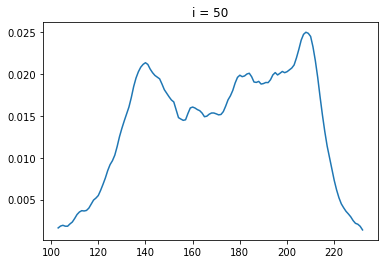

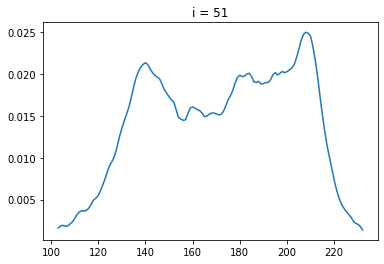

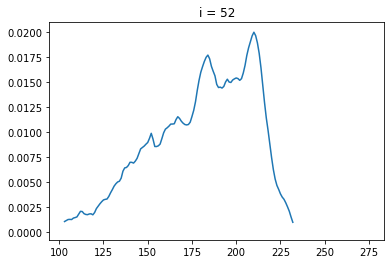

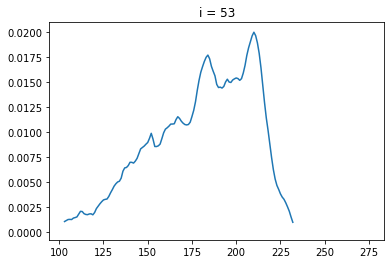

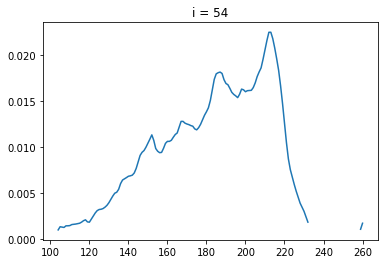

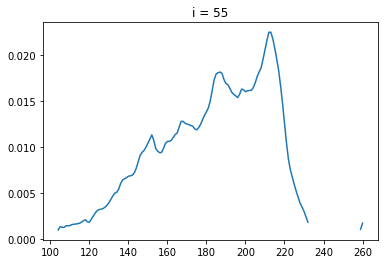

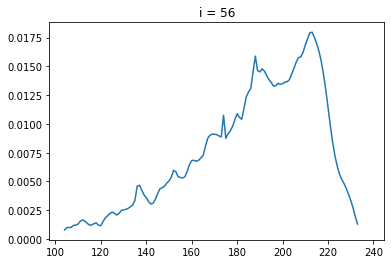

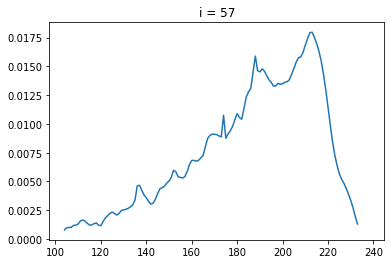

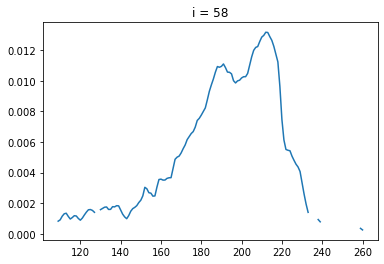

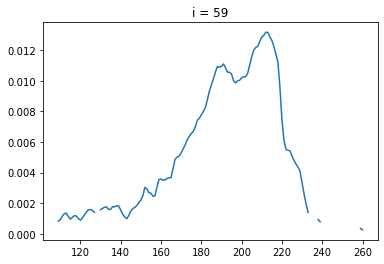

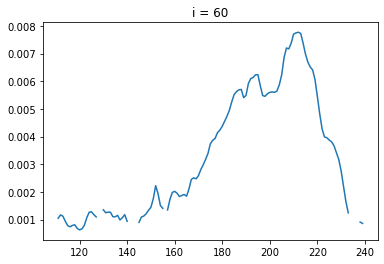

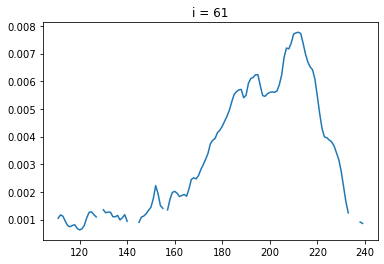

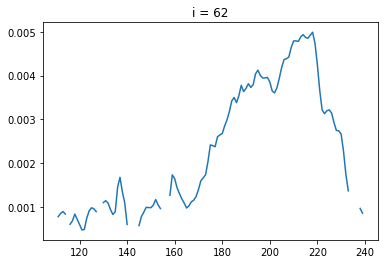

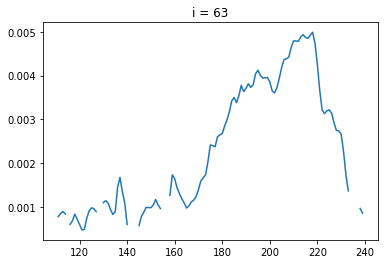

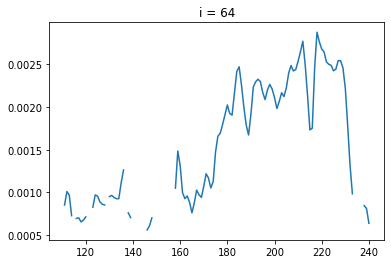

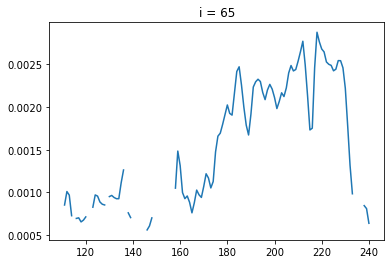

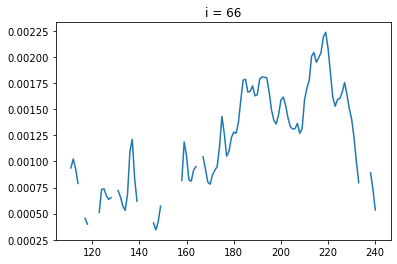

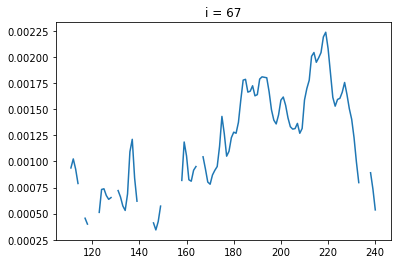

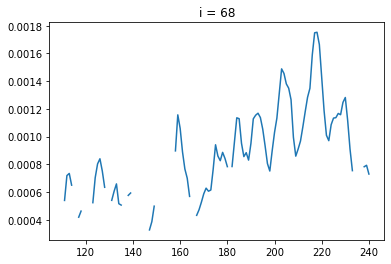

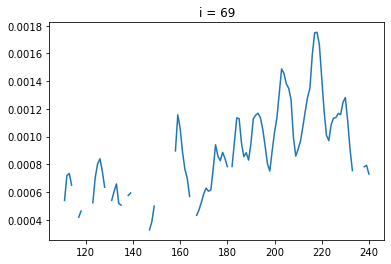

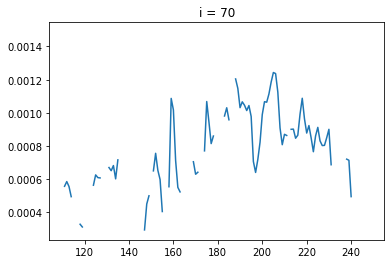

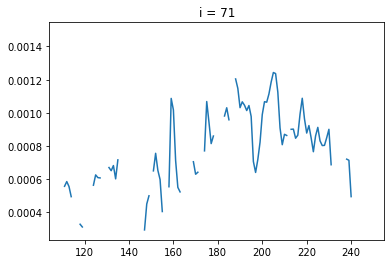

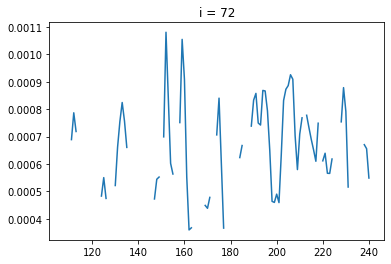

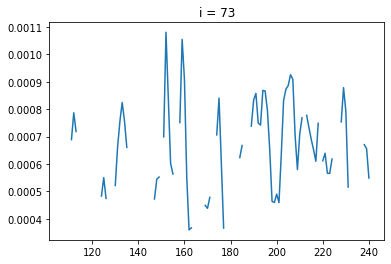

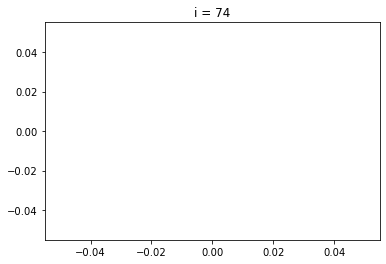

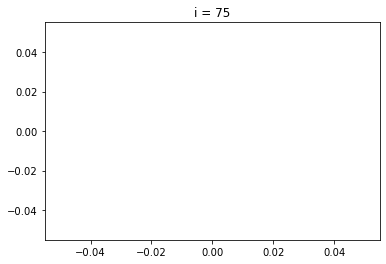

In [44]:
for i in range(len(h3p_int_rs)):
    plt.figure()
    plt.plot(h3p_int_rs[i])
    plt.title('i = '+str(i))

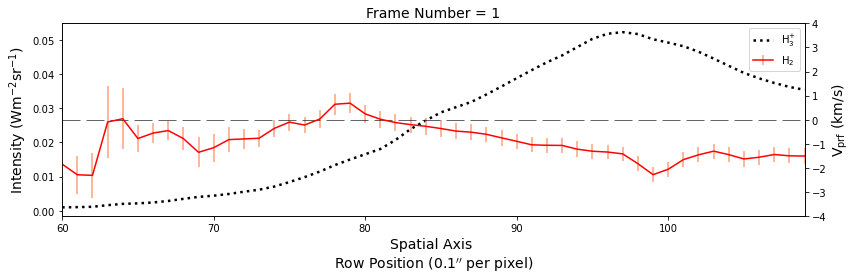

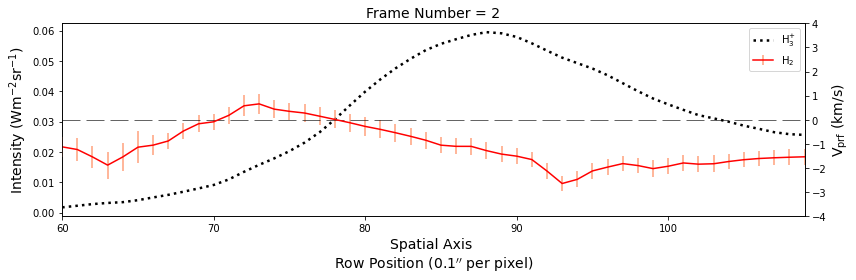

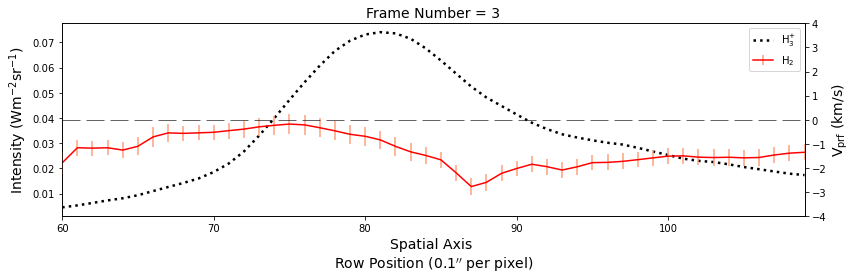

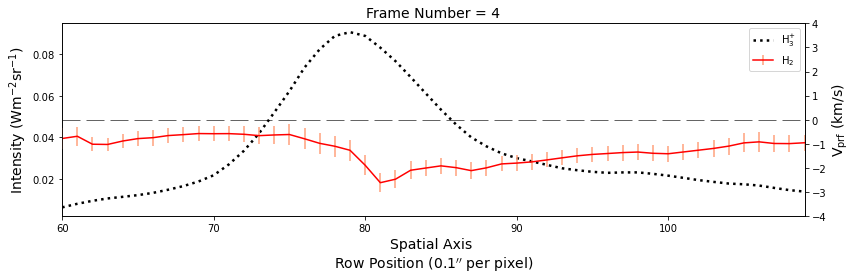

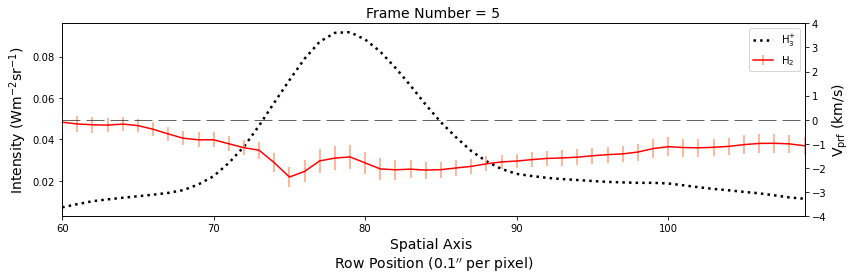

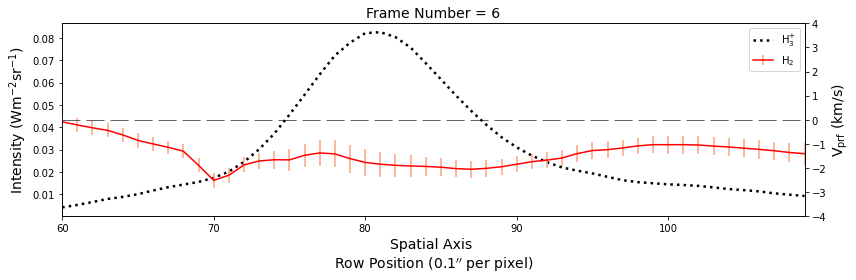

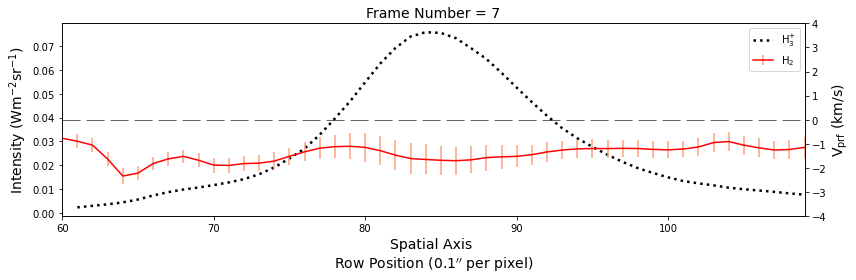

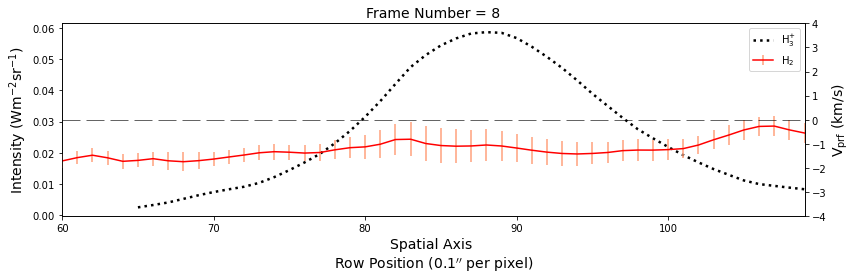

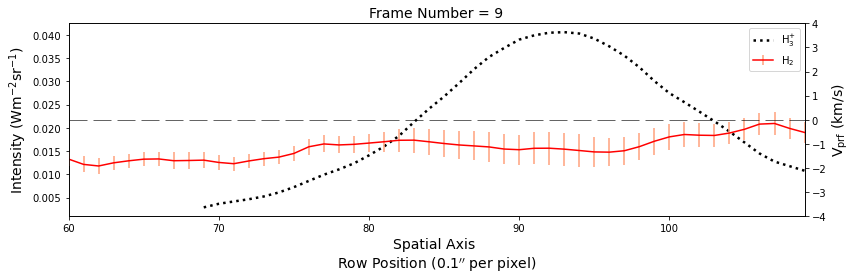

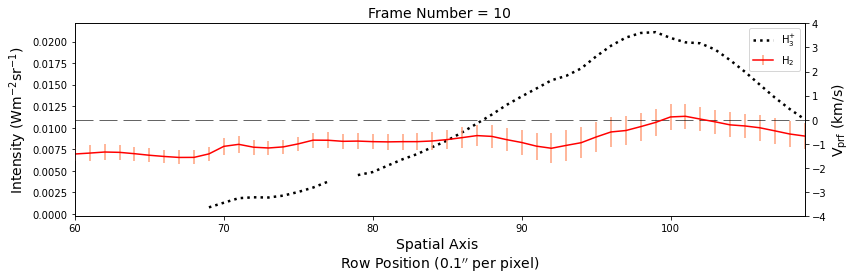

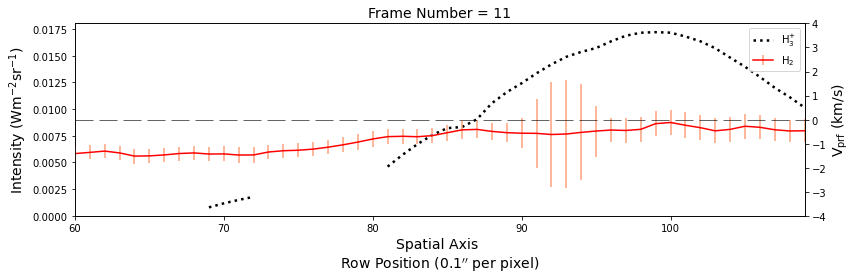

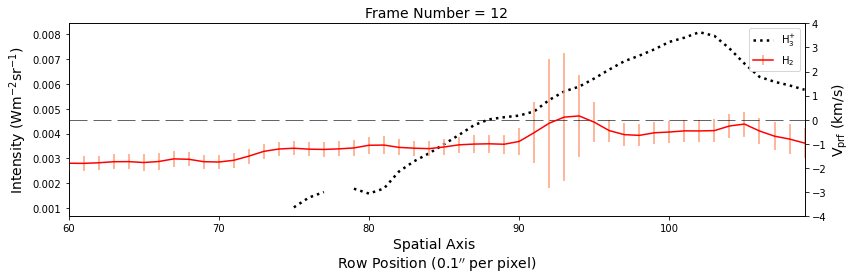

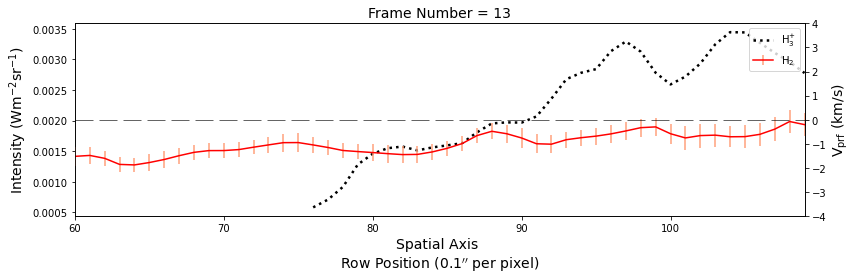

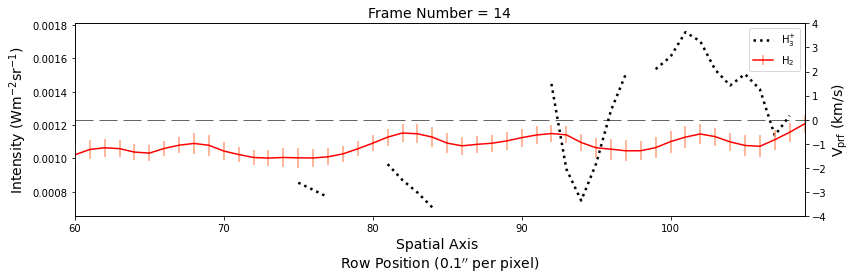

In [16]:
a2 = h2_vprf*(-1)
b2 = h3p_vprf*(-1)

c2 = b2 - a2
errc2 = np.sqrt((h3p_verr)**2 + (h2_verr)**2)

for i in range(len(h3p_vprf)):
# for i in range(2):
    if i not in (0,15,16,37) and i < 16:  
        xnew = np.linspace(0,299,300)[60:110]
        int2 = (ref_sun/np.nanmax(ref_sun[i])*np.nanmax(h3p_int[i]))
        
        fig, ax = plt.subplots(figsize = (12, 4))
        plt.title('Frame Number = '+ str(i), fontsize=14)
        
        ax2 = ax.twinx()
        ax.plot(xnew, h3p_int[i][60:110], color='k', ls=':', label='H$_3^{+}$', lw=2.5)
#         ax.plot(xnew, int2[i], color='orange', ls='-.', label='Refl Sunlight', lw=1)
        ax2.errorbar(xnew, a2[i][60:110], yerr=h2_verr[i][60:110], color='r', ecolor='lightsalmon', label='H$_2$')
#         ax2.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='b', ecolor='lightblue', label='H$_3^{+}$')
#         ax2.errorbar(xnew, c2[i], yerr=errc2[i], color='green', ecolor='lightgreen', label='H$_3^{+}$-H$_2$')
        
        # giving labels to the axises
        ax.set_xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
        ax.set_ylabel('Intensity (Wm$^{-2}$sr$^{-1}$)', fontsize=14)

        # secondary y-axis label
        ax2.set_ylabel('V$_{\mathrm{prf}}$ (km/s)', fontsize=14)
        
#         plt.figure(figsize=(12,4))
#         plt.plot(a2[num], label='H2')
#         plt.plot(b2[num], label='H3+')
#         plt.plot(xnew, int2[i], color='teal', ls='-', label='H$_3^{+}$ - Int')
#         plt.errorbar(xnew, a2[i], yerr=h2_verr[i], color='red', ecolor='gray', label='H$_2$')
#         plt.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='blue', ecolor='lightblue', label='H$_3^{+}$')
        plt.axhline(y=0, xmin=0, xmax=250, color='black', ls='dashed', dashes=(30, 10), lw=0.6)
        plt.xlim(xnew[0], xnew[-1])
        plt.ylim(-4,4)
#         plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
#         plt.ylabel('V$_{\mathrm{PRF}}$ (km/s)', fontsize=14)
        
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc=0)
        
        plt.tight_layout()
#         plt.savefig(imgpath + '/h2_h3p_int_vel_fr' +str(i), dpi=400, bbox_inches='tight', facecolor='white')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


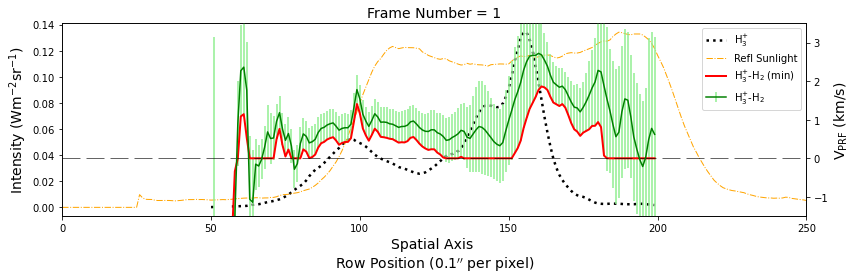

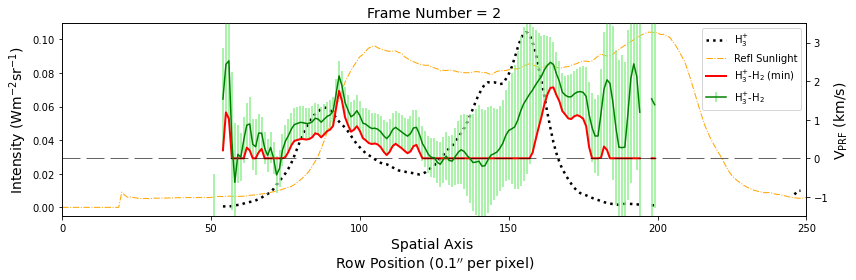

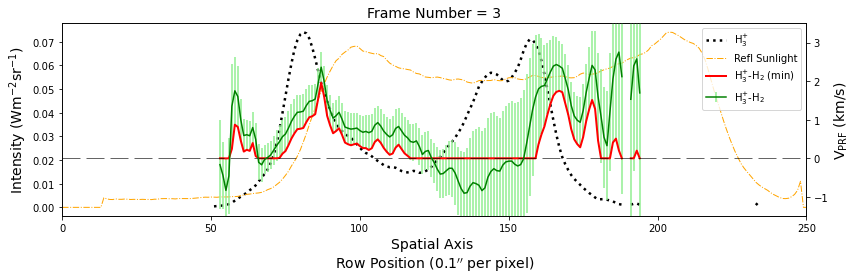

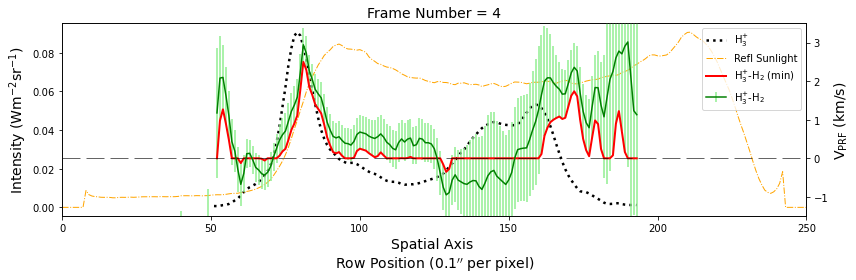

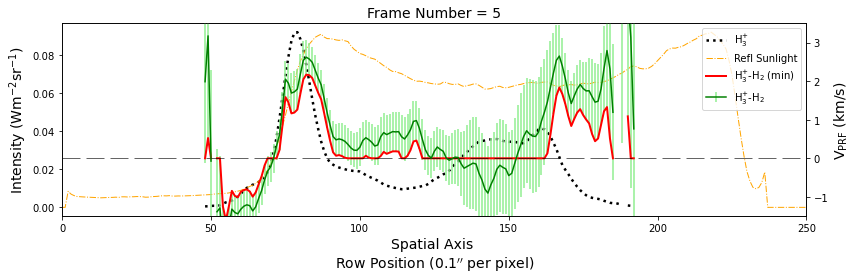

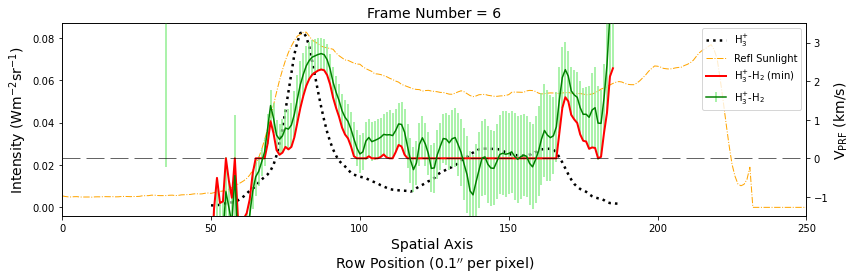

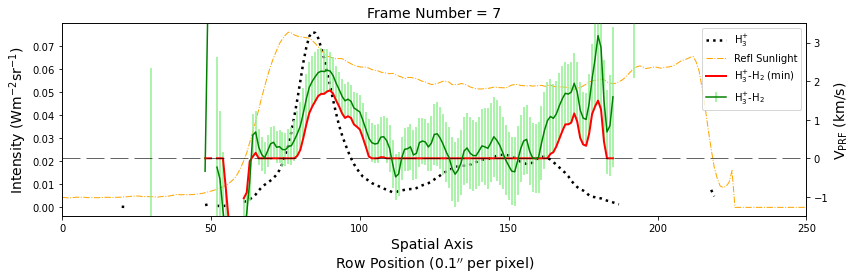

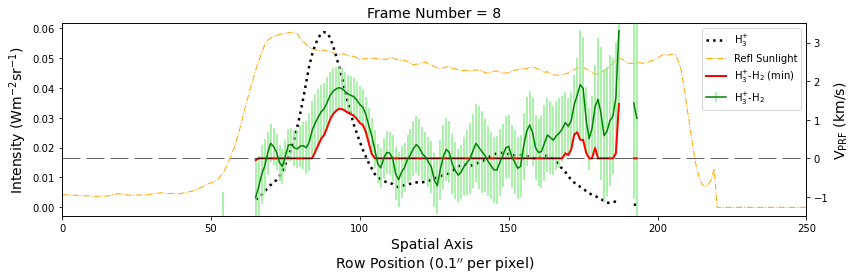

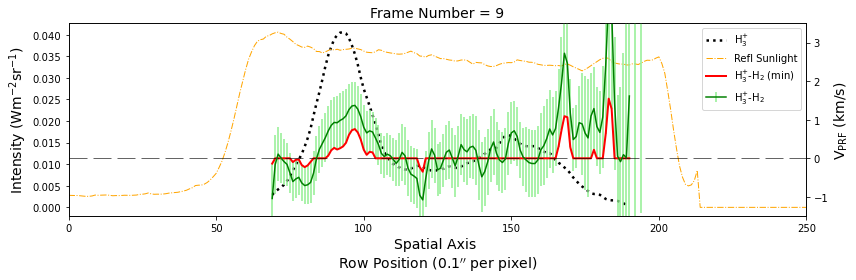

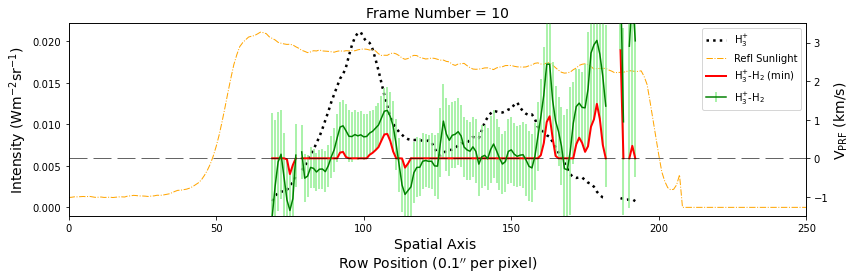

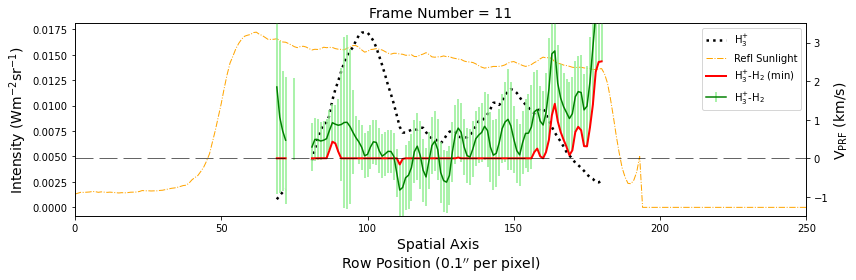

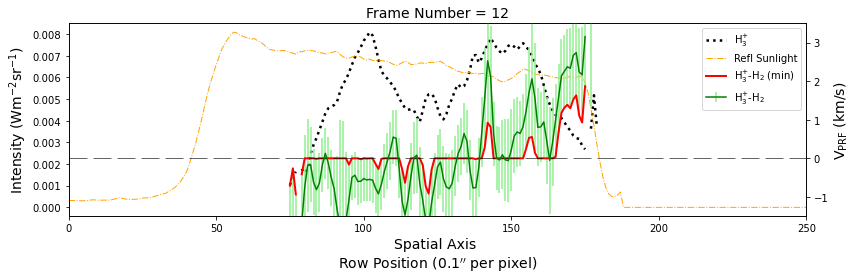

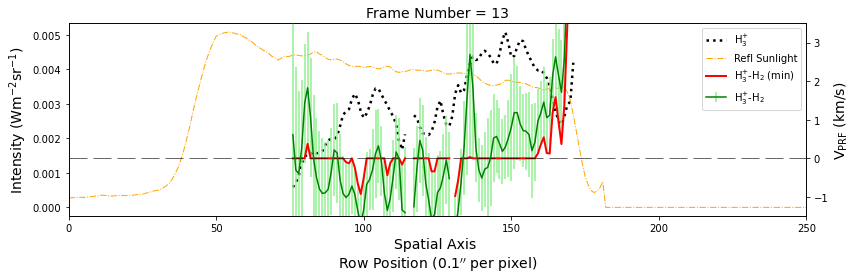

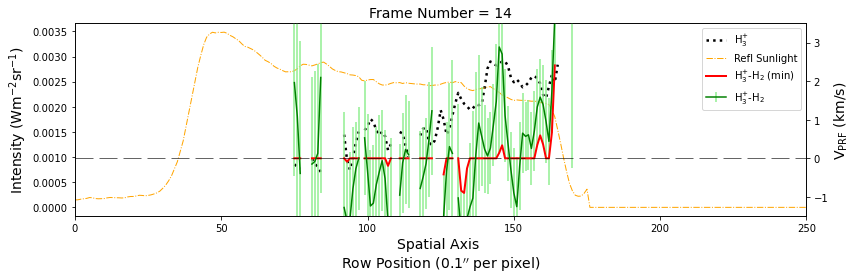

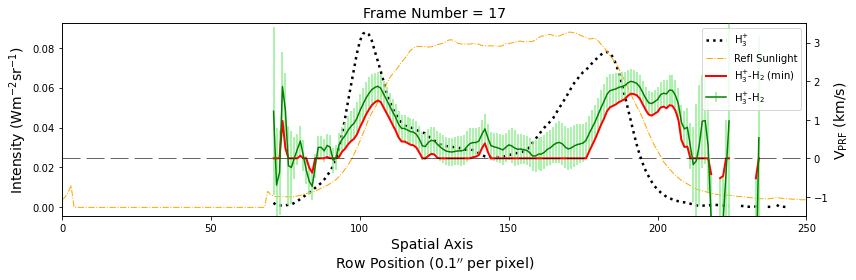

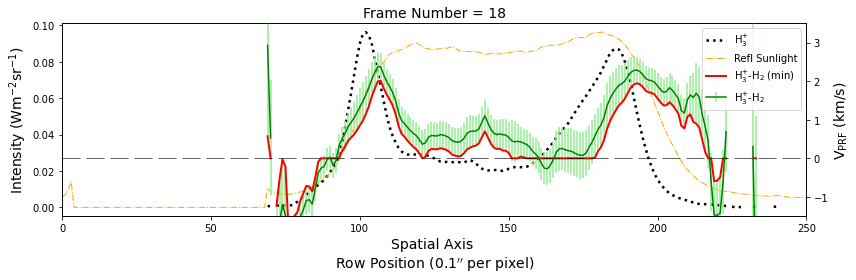

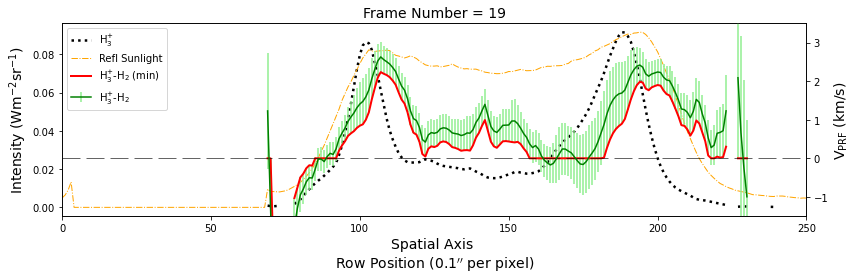

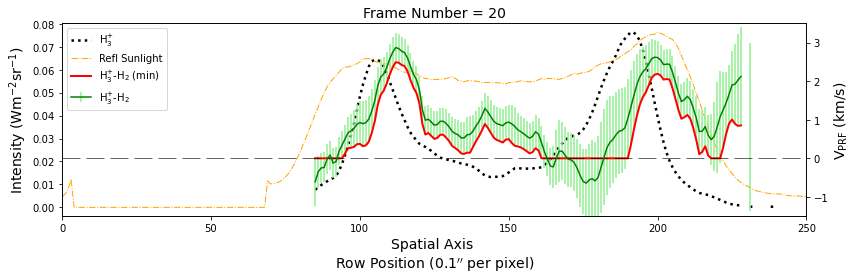

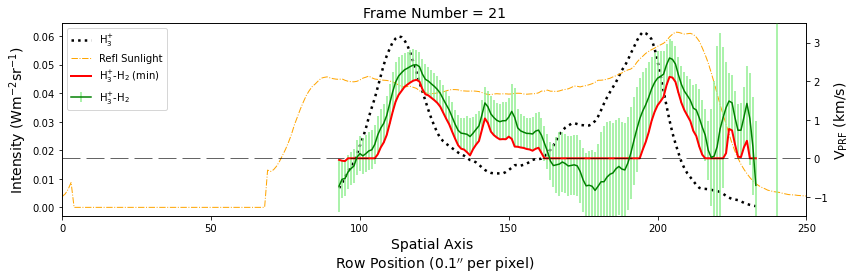

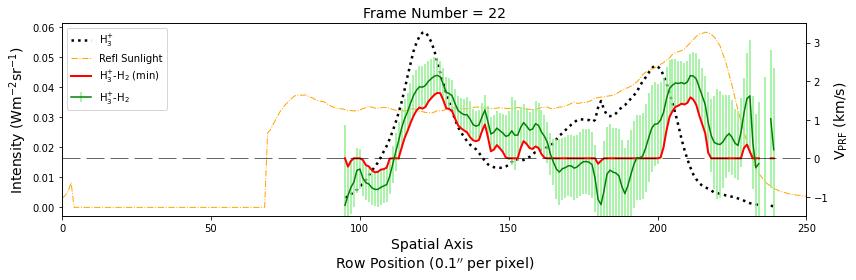

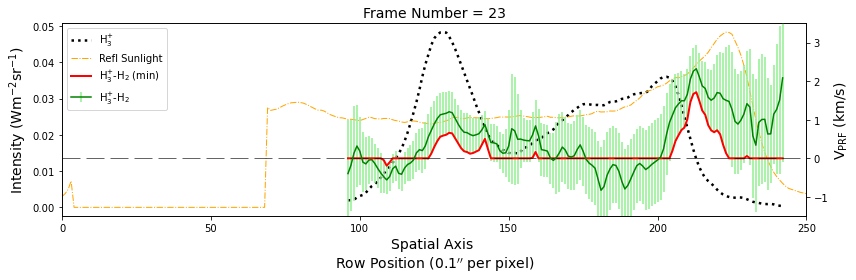

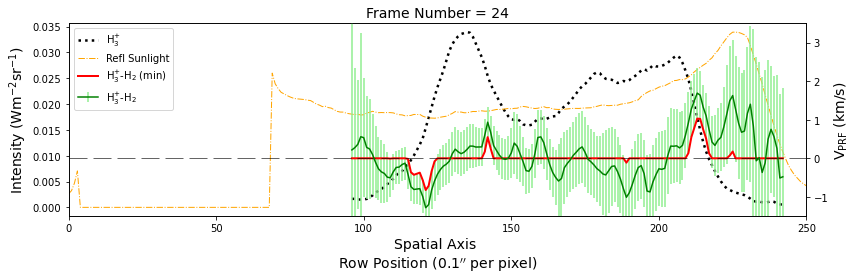

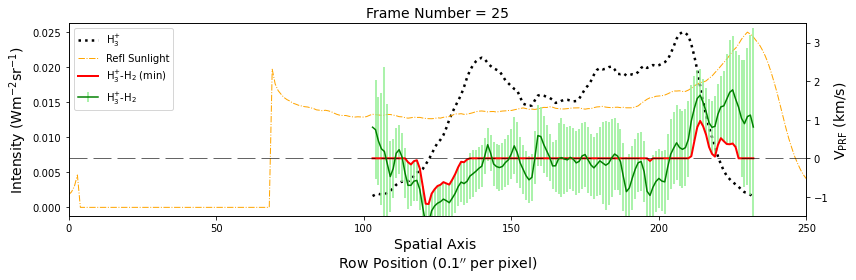

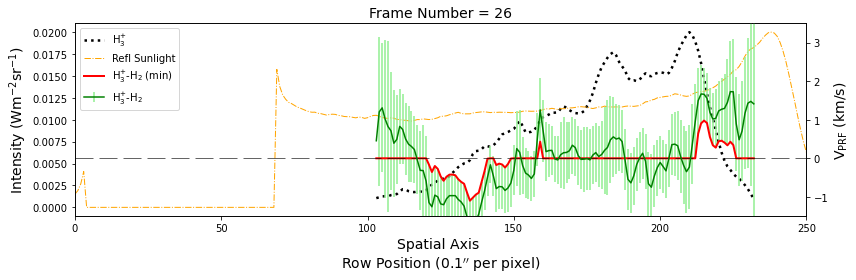

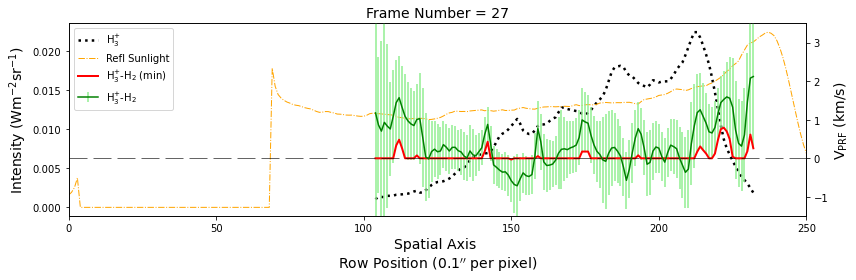

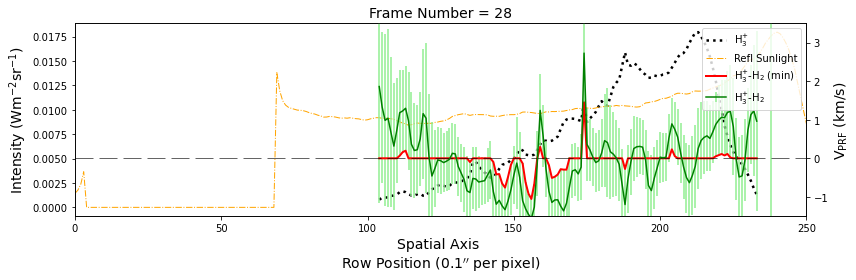

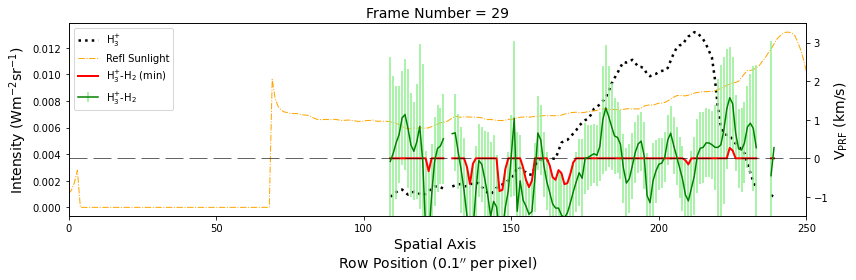

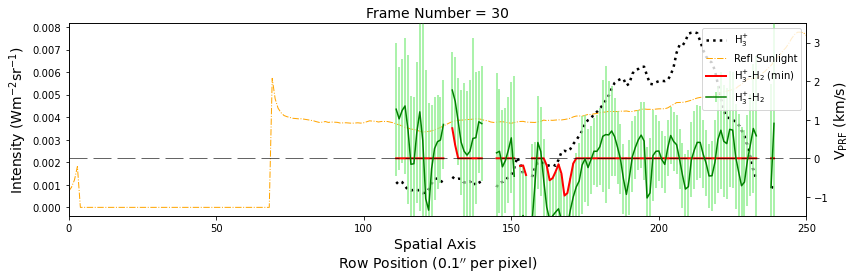

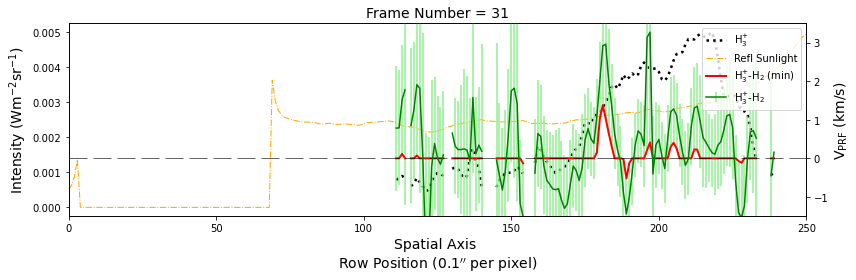

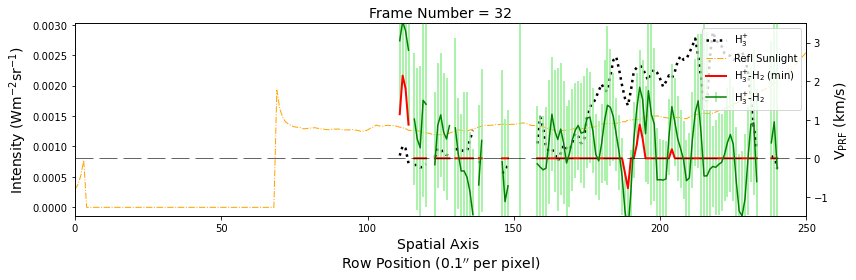

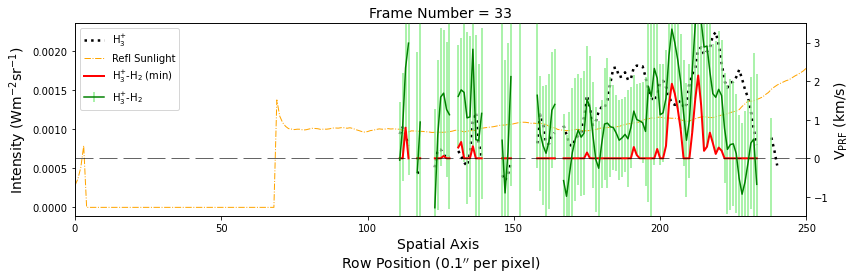

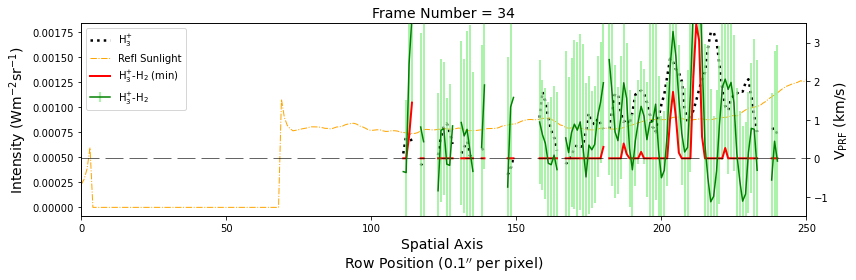

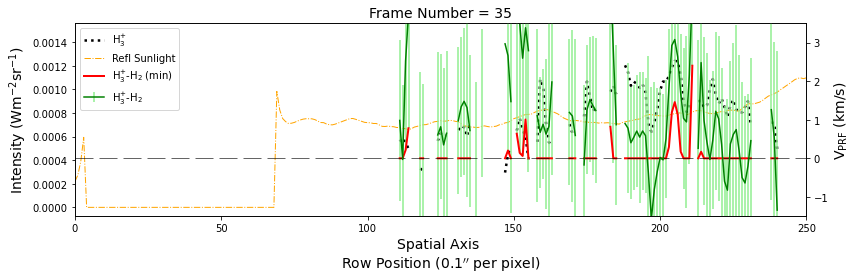

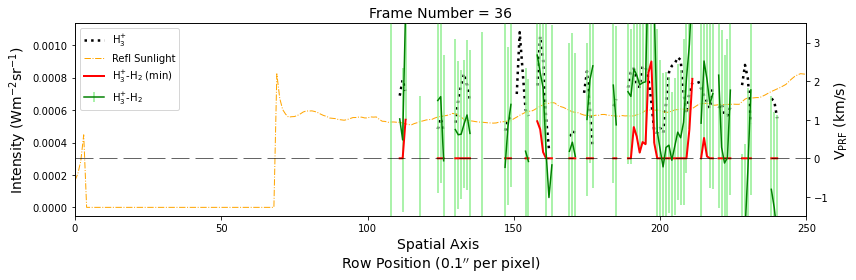

In [5]:
c3 = c2 + 0
c_min = c2 - errc2
c_max = c2 + errc2
c_max_t = c3/c_max
c_min_t = c3/c_min
c_max_t[c_max_t <0] = 0
c_min_t[c_min_t <0] = 0
m3 = c_max_t * c_min_t

m3[m3 > 0] = 1

d3 = c3 * m3
d3a = c_min * m3
d3b = c_max * m3

e3 = c3 *0
e3[d3 > 0] = c_min[d3 > 0]
e3[d3 < 0] = c_max[d3 < 0]

for i in range(len(h3p_vprf)):
# for i in range(2):
    if i not in (0,15,16,37):  
        xnew = np.linspace(0,299,300)
#         int2 = (h3p_int/np.nanmax(h3p_int[i])*7.9-3.95)
        int2 = (ref_sun/np.nanmax(ref_sun[i])*np.nanmax(h3p_int[i]))
        
        fig, ax = plt.subplots(figsize = (12, 4))
        plt.title('Frame Number = '+ str(i), fontsize=14)
        
        ax2 = ax.twinx()
        ax.plot(xnew, h3p_int[i], color='k', ls=':', label='H$_3^{+}$', lw=2.5)
        ax.plot(xnew, int2[i], color='orange', ls='-.', label='Refl Sunlight', lw=1)
#         ax2.errorbar(xnew, a2[i], yerr=h2_verr[i], color='red', ecolor='lightsalmon', label='H$_2$')
#         ax2.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='blue', ecolor='lightblue', label='H$_3^{+}$')
        ax2.errorbar(xnew, c3[i], yerr=errc2[i], color='green', ecolor='lightgreen', label='H$_3^{+}$-H$_2$')
        ax2.plot(xnew, e3[i], color='red', ls='-', label='H$_3^{+}$-H$_2$ (min)', lw=2)
        
        # giving labels to the axises
        ax.set_xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
        ax.set_ylabel('Intensity (Wm$^{-2}$sr$^{-1}$)', fontsize=14)

        # secondary y-axis label
        ax2.set_ylabel('V$_{\mathrm{PRF}}$ (km/s)', fontsize=14)
        plt.axhline(y=0, xmin=0, xmax=250, color='black', ls='dashed', dashes=(30, 10), lw=0.6)
        plt.xlim(0,250)
#         plt.ylim(-4,4)
        plt.ylim(-1.5,3.5)
        
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc=0)
        
        plt.tight_layout()
#         plt.savefig(imgpath + '/h2_h3p_curr_fr' +str(i), dpi=400, bbox_inches='tight', facecolor='white')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to n

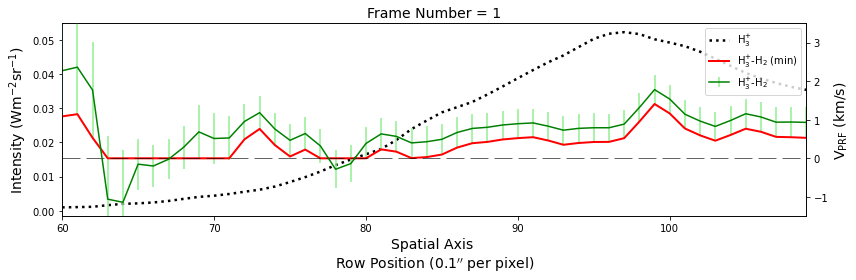

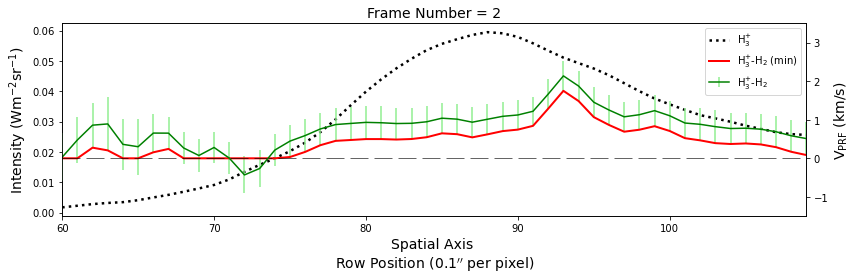

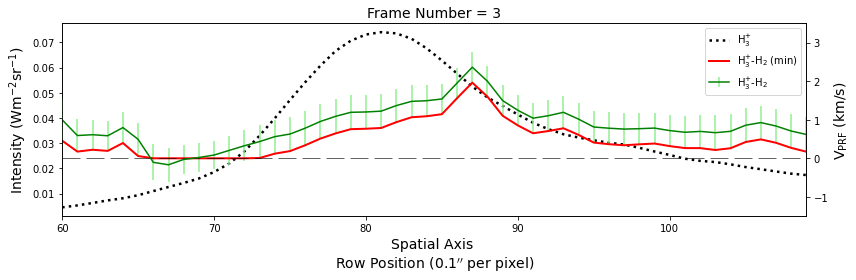

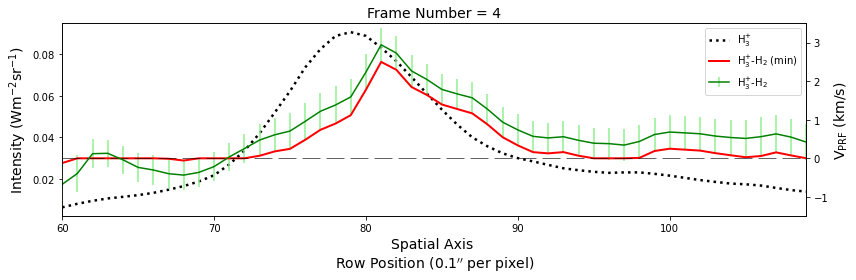

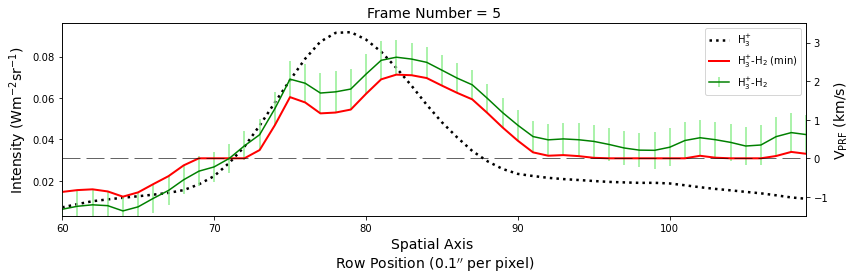

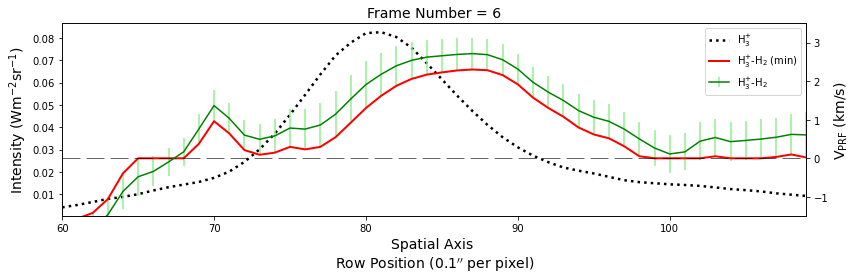

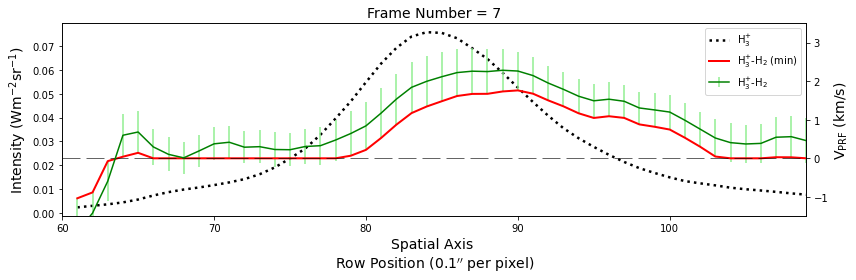

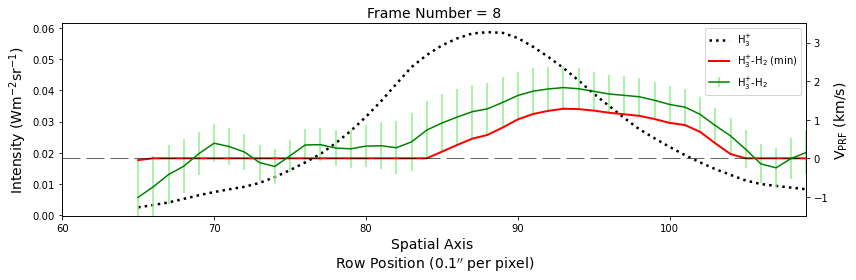

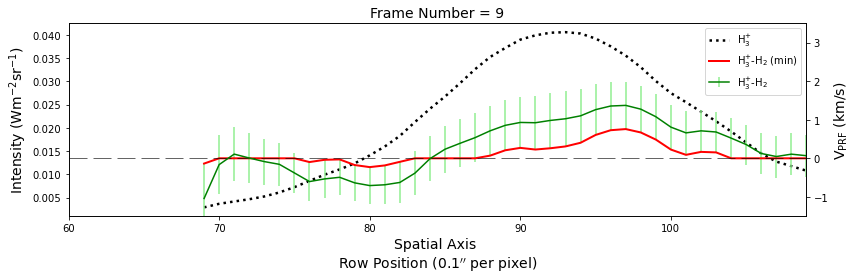

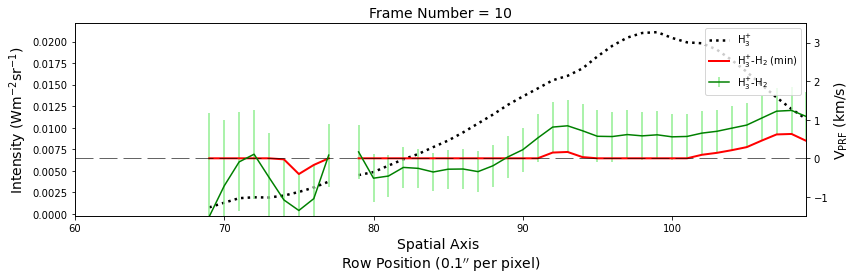

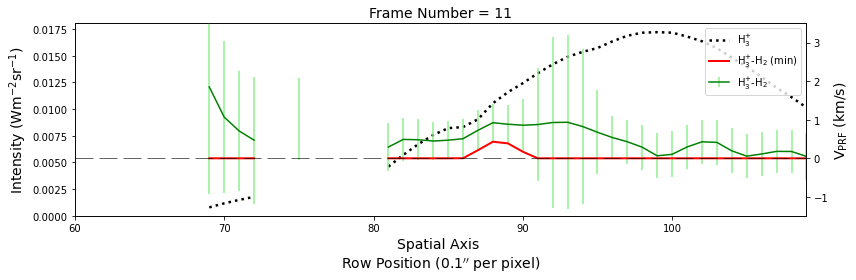

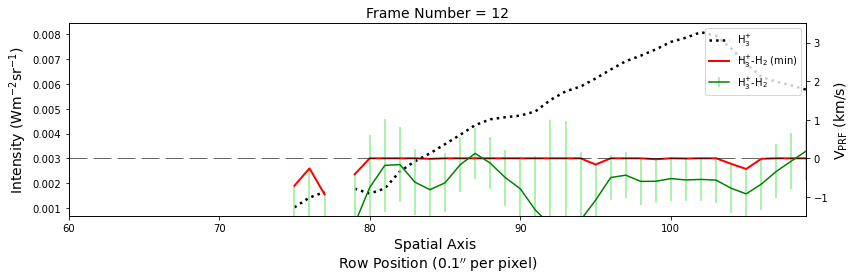

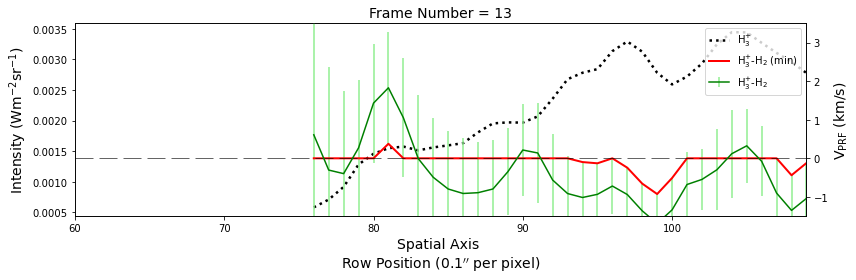

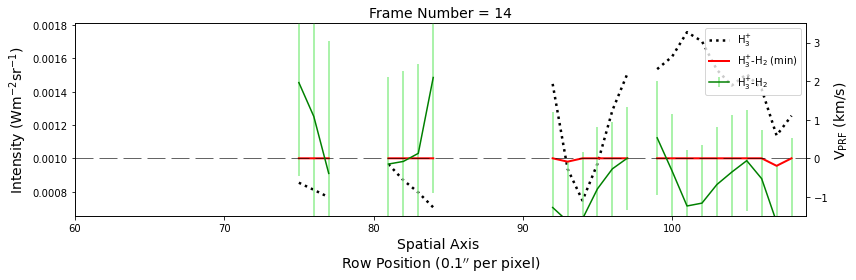

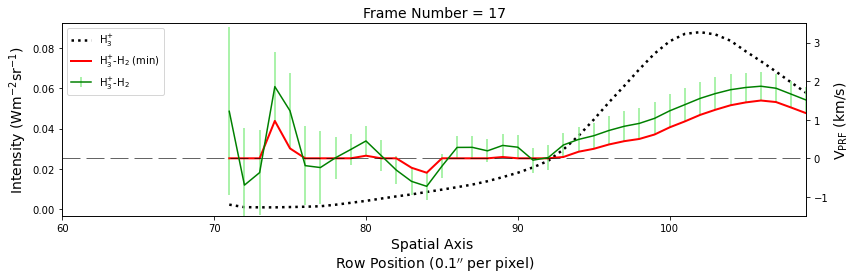

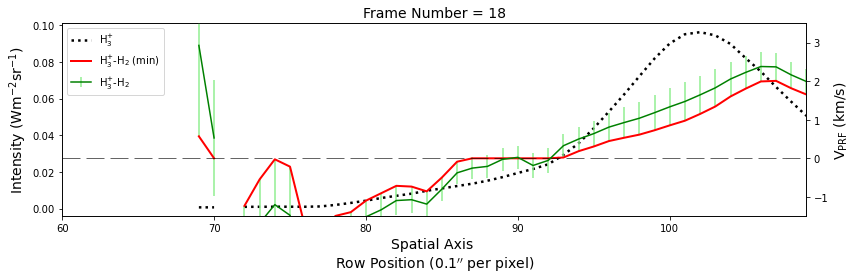

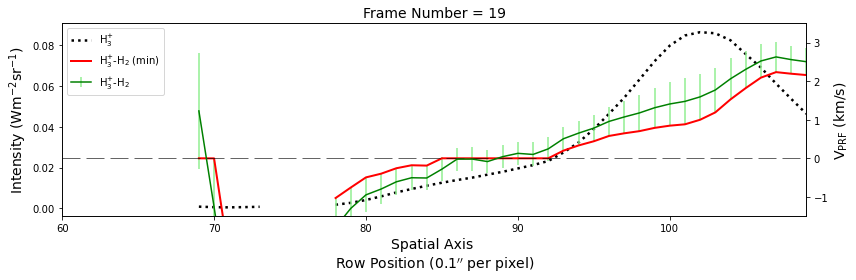

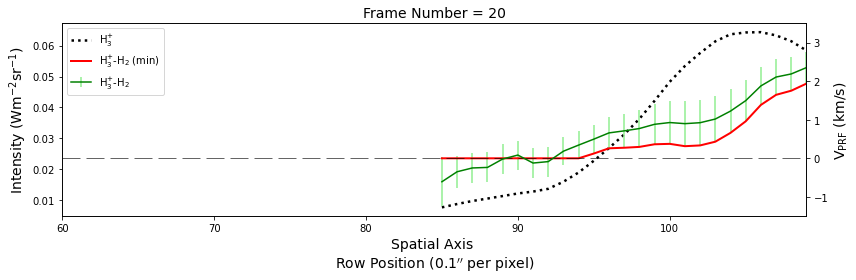

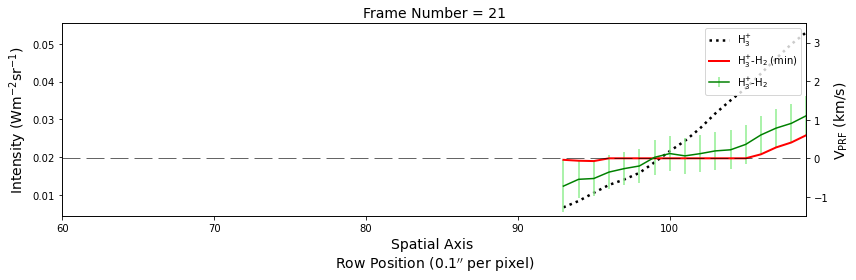

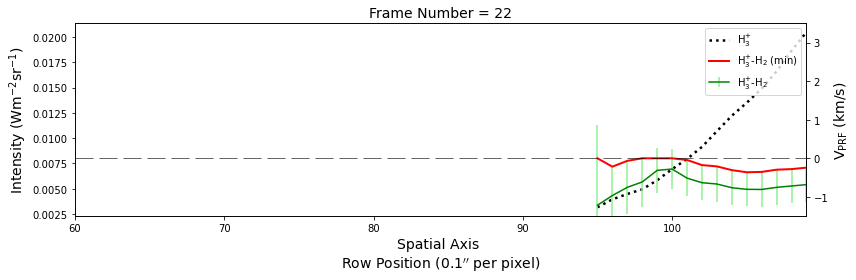

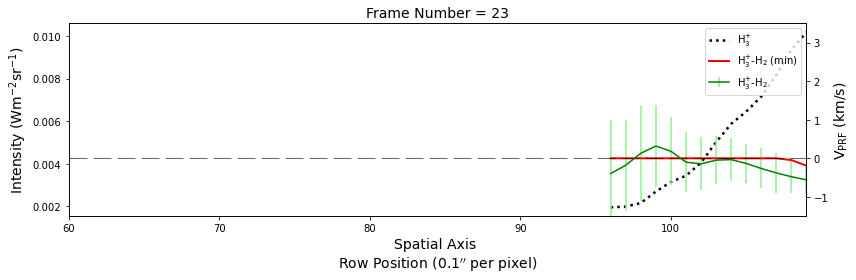

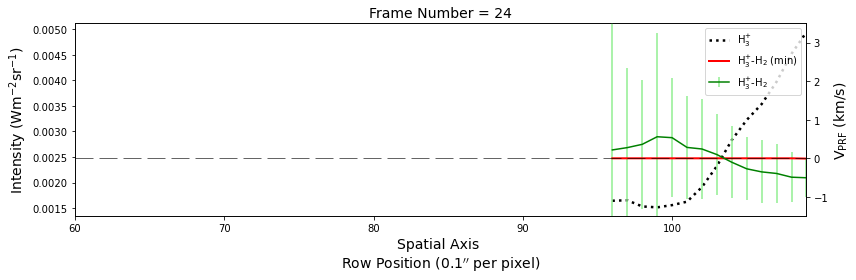

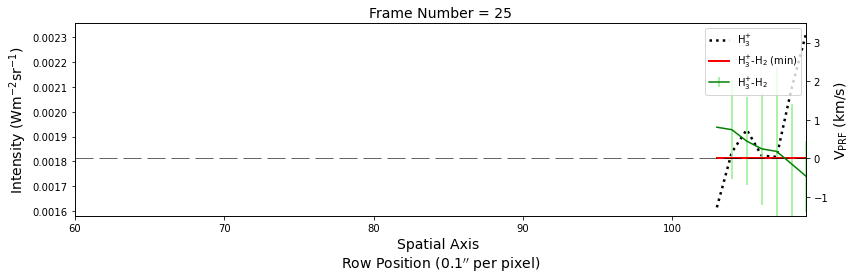

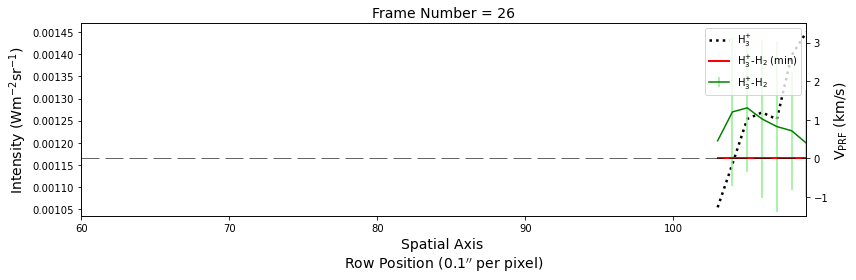

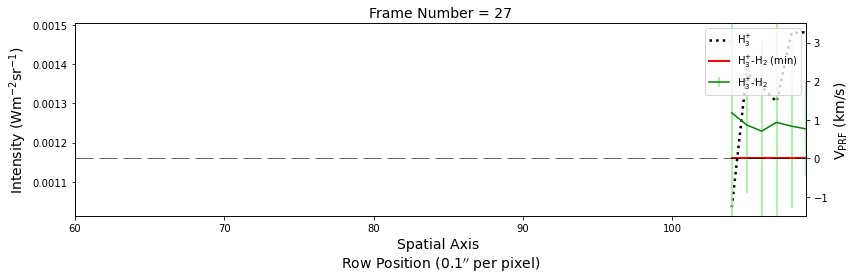

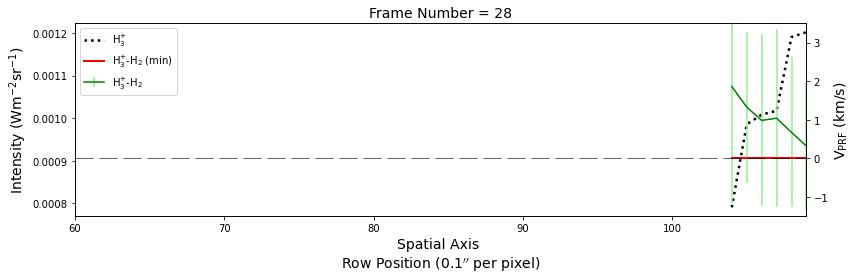

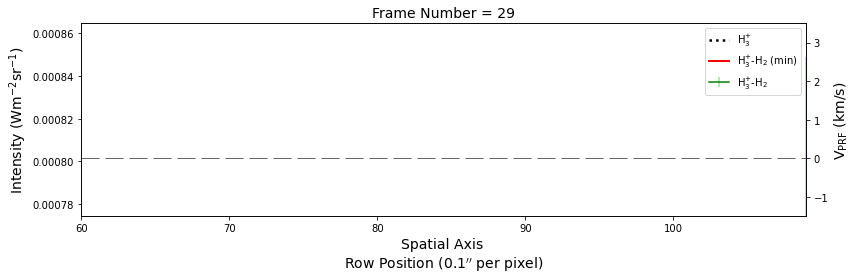

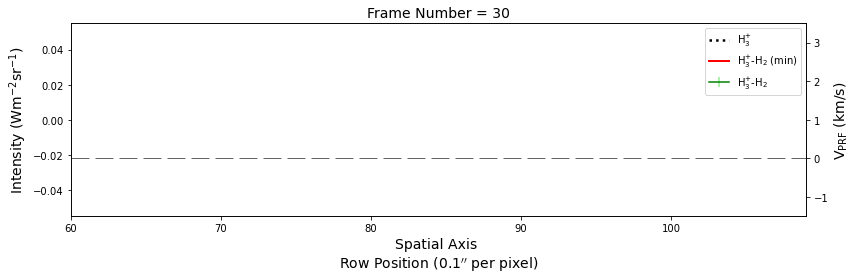

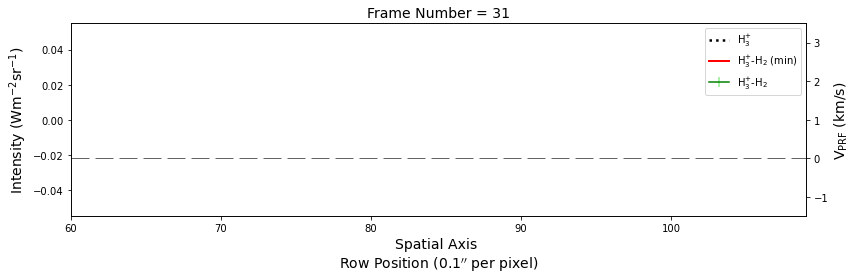

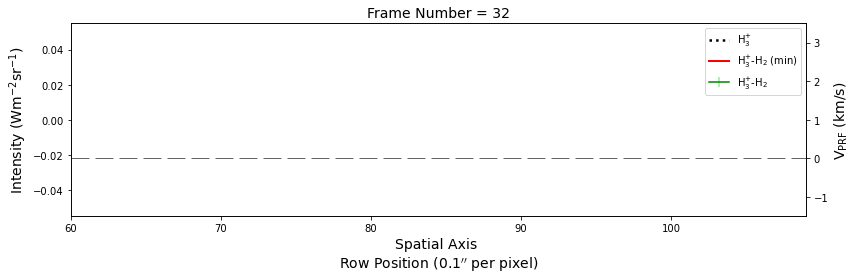

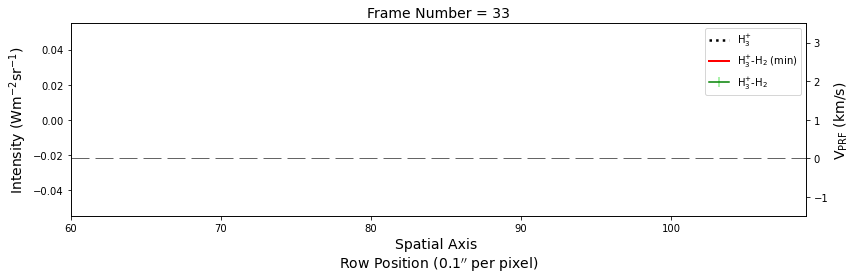

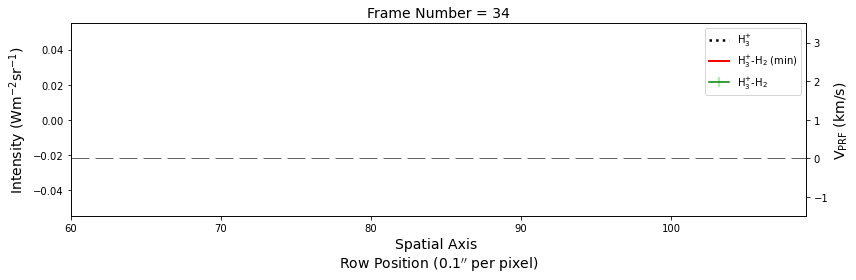

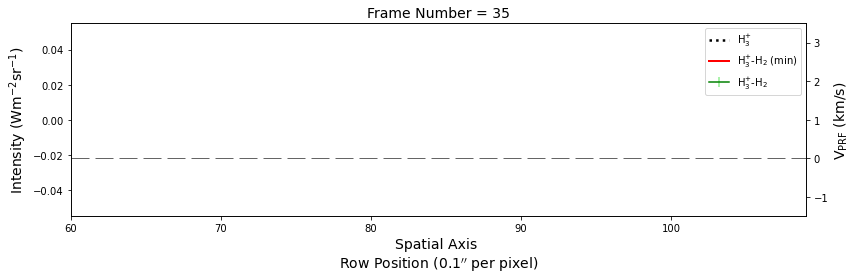

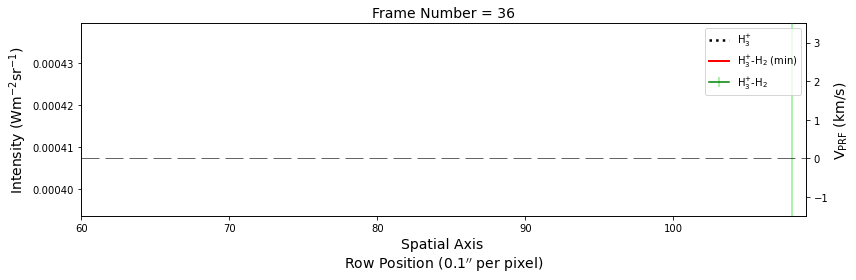

In [17]:
c3 = c2 + 0
c_min = c2 - errc2
c_max = c2 + errc2
c_max_t = c3/c_max
c_min_t = c3/c_min
c_max_t[c_max_t <0] = 0
c_min_t[c_min_t <0] = 0
m3 = c_max_t * c_min_t

m3[m3 > 0] = 1

d3 = c3 * m3
d3a = c_min * m3
d3b = c_max * m3

e3 = c3 *0
e3[d3 > 0] = c_min[d3 > 0]
e3[d3 < 0] = c_max[d3 < 0]

for i in range(len(h3p_vprf)):
# for i in range(2):
    if i not in (0,15,16,37) and i < 16:  
        xnew = np.linspace(0,299,300)[60:110]
#         int2 = (h3p_int/np.nanmax(h3p_int[i])*7.9-3.95)
        int2 = (ref_sun/np.nanmax(ref_sun[i])*np.nanmax(h3p_int[i]))
        
        fig, ax = plt.subplots(figsize = (12, 4))
        plt.title('Frame Number = '+ str(i), fontsize=14)
        
        ax2 = ax.twinx()
        ax.plot(xnew, h3p_int[i][60:110], color='k', ls=':', label='H$_3^{+}$', lw=2.5)
#         ax.plot(xnew, int2[i], color='orange', ls='-.', label='Refl Sunlight', lw=1)
#         ax2.errorbar(xnew, a2[i], yerr=h2_verr[i], color='red', ecolor='lightsalmon', label='H$_2$')
#         ax2.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='blue', ecolor='lightblue', label='H$_3^{+}$')
        ax2.errorbar(xnew, c3[i][60:110], yerr=errc2[i][60:110], color='green', ecolor='lightgreen', label='H$_3^{+}$-H$_2$')
        ax2.plot(xnew, e3[i][60:110], color='red', ls='-', label='H$_3^{+}$-H$_2$ (min)', lw=2)
        
        # giving labels to the axises
        ax.set_xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
        ax.set_ylabel('Intensity (Wm$^{-2}$sr$^{-1}$)', fontsize=14)

        # secondary y-axis label
        ax2.set_ylabel('V$_{\mathrm{PRF}}$ (km/s)', fontsize=14)
        plt.axhline(y=0, xmin=0, xmax=250, color='black', ls='dashed', dashes=(30, 10), lw=0.6)
        plt.xlim(xnew[0],xnew[-1])
#         plt.ylim(-4,4)
        plt.ylim(-1.5,3.5)
        
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc=0)
        
        plt.tight_layout()
#         plt.savefig(imgpath + '/h2_h3p_curr_fr' +str(i), dpi=400, bbox_inches='tight', facecolor='white')

ar_sl = []
for i in range(23,37):
    yy = a2[i][:160][np.isfinite(a2[i][:160])]
    xx = range(len(yy))

    mod = LinearModel()

    pars = mod.guess(yy, x=xx)
    out = mod.fit(yy, pars, x=xx)

    sl = out.params['slope'].value
    intc = out.params['intercept'].value

    ny = sl*xx+intc
    
    plt.figure()
    plt.plot(xx, yy, 'k.', label='original')
    plt.plot(xx, ny, 'r', label='best fit')
    plt.title('Frame Number = '+str(i))
    plt.legend()
    
    print(str(i)+' slope = '+str(sl))
    ar_sl.append(sl)
ar_sl = np.array(ar_sl)

plt.plot(range(23,37),ar_sl)
plt.xlabel('Frame Number')
plt.ylabel('vel (km/s/pixel')
plt.title('H2 Velocity Slope')

In [28]:
peak1rs = np.array(Image.fromarray(peak1).resize(size=(76, 1)))

In [30]:
peak1

array([ nan,  97.,  88.,  81.,  79.,  79.,  81.,  84.,  88.,  93.,  99.,
        nan,  nan,  nan,  nan,  nan,  nan, 102., 102., 102., 106., 113.,
       122., 128., 135., 140.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan])

In [38]:
range(len(peak1))

range(0, 38)

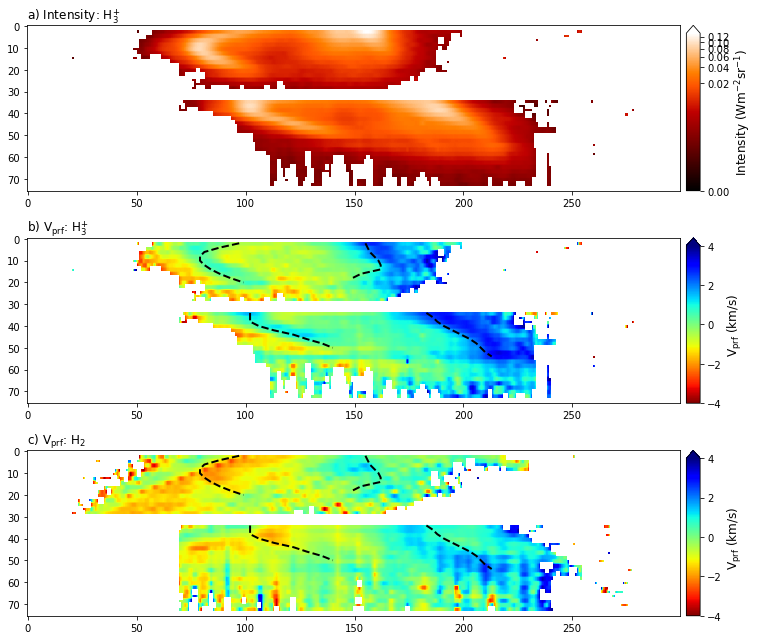

In [46]:
h3p_int_rs = np.array(Image.fromarray(h3p_int).resize(size=(300, 76), resample=0))
h3p_vprf_rs = np.array(Image.fromarray(b2).resize(size=(300, 76), resample=0))
h2_vprf_rs = np.array(Image.fromarray(a2).resize(size=(300, 76), resample=0))
curr_rs = np.array(Image.fromarray(c3).resize(size=(300, 76), resample=0))
curr_min_rs = np.array(Image.fromarray(e3).resize(size=(300, 76), resample=0))

fig = plt.figure(figsize=(18,9), tight_layout=True)

fig.add_subplot(311)
plt.imshow(h3p_int_rs, aspect='equal', cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=12)
# plt.ylabel('Frame Number', fontsize=12)
plt.title('a) Intensity: H$_3^{+}$', loc='left', fontsize=12)
plt.colorbar(extend='max', aspect=12, pad=0.005).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=12)

fig.add_subplot(312)
plt.imshow(h3p_vprf_rs, aspect='equal', cmap='jet_r', vmin=-4, vmax=4)
plt.plot(peak1, range(0, len(peak1)*2, 2), ls='--', lw=2, color='black')
plt.plot(peak2, range(0, len(peak2)*2, 2), ls='--', lw=2, color='black')
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=12)
# plt.ylabel('Frame Number', fontsize=12)
plt.title('b) V$_{\mathrm{prf}}$: H$_3^{+}$', loc='left', fontsize=12)
plt.colorbar(extend='max', aspect=12, pad=0.005).set_label(label='V$_{\mathrm{prf}}$ (km/s)',size=12)

fig.add_subplot(313)
plt.imshow(h2_vprf_rs, aspect='equal', cmap='jet_r', vmin=-4, vmax=4)
plt.plot(peak1, range(0, len(peak1)*2, 2), ls='--', lw=2, color='black')
plt.plot(peak2, range(0, len(peak2)*2, 2), ls='--', lw=2, color='black')
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=12)
# plt.ylabel('Frame Number', fontsize=18)
plt.title('c) V$_{\mathrm{prf}}$: H$_2$', loc='left', fontsize=12)
plt.colorbar(extend='max', aspect=12, pad=0.005).set_label(label='V$_{\mathrm{prf}}$ (km/s)',size=12)

# fig.add_subplot(514)
# plt.imshow(curr_rs, aspect='equal', cmap='jet_r', vmin=-1.5, vmax=3.5)
# plt.plot(peak1, range(len(peak1)), ls='--', lw=2, color='black')
# plt.plot(peak2, range(len(peak2)), ls='--', lw=2, color='black')
# # plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=12)
# # plt.ylabel('Frame Number', fontsize=12, alpha=0)
# plt.title('d) V$_{\mathrm{prf}}$: H$_3^{+}$ - H$_2$', loc='left', fontsize=12)
# plt.colorbar(extend='max', aspect=12, pad=0.005).set_label(label='V$_{\mathrm{prf}}$ (km/s)',size=12)

# fig.add_subplot(515)
# plt.imshow(curr_min_rs, aspect='equal', cmap='jet_r', vmin=-2, vmax=2)
# plt.plot(peak1, range(len(peak1)), ls='--', lw=2, color='black')
# plt.plot(peak2, range(len(peak2)), ls='--', lw=2, color='black')
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
# plt.ylabel('Frame Number', fontsize=10, alpha=0)
# plt.title('e) V$_{\mathrm{prf}}$: H$_3^{+}$ - H$_2$ ($\mathrm{min}$)', loc='left', fontsize=12)
# plt.colorbar(extend='max', aspect=12, pad=0.005).set_label(label='V$_{\mathrm{prf}}$ (km/s)',size=12)

# fig.supxlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=12)
# fig.supylabel('Frame Number', fontsize=12)
# plt.savefig(imgpath + '/h2_h3p_int_vel_curr_map', dpi=400, bbox_inches='tight', facecolor='white')

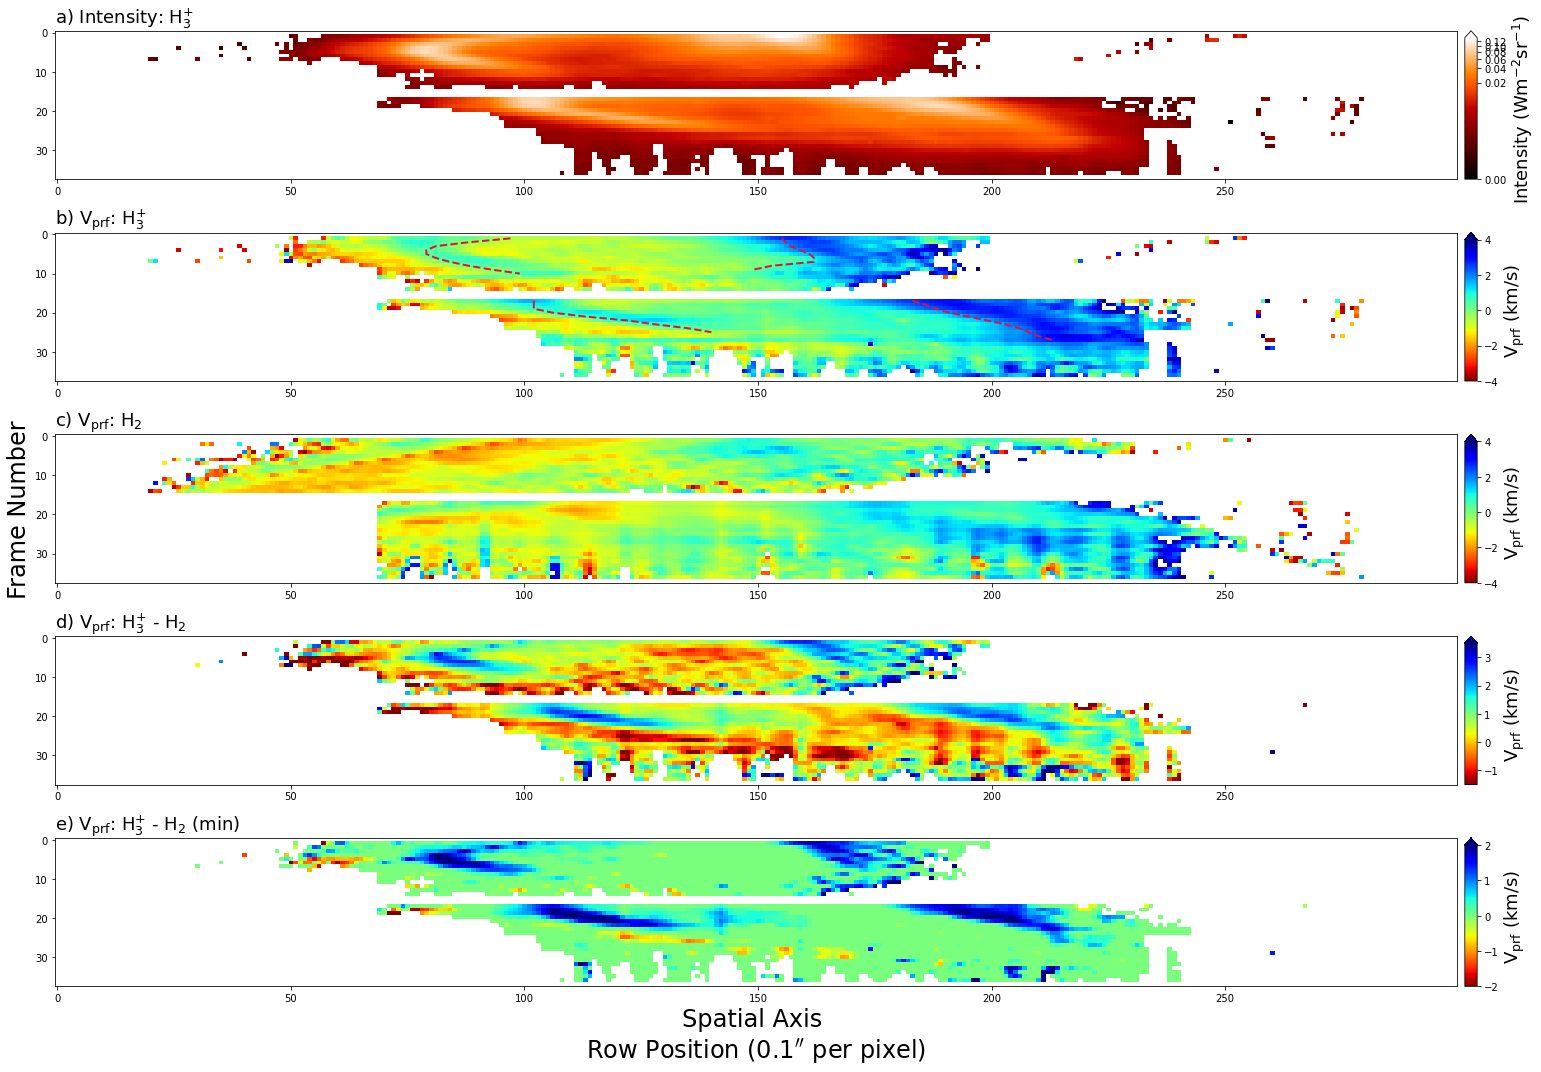

In [13]:
fig = plt.figure(figsize=(24,15), tight_layout=True)

fig.add_subplot(511)
plt.imshow(h3p_int, aspect='auto', cmap='gist_heat', norm=colors.PowerNorm(gamma=0.2))
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
# plt.ylabel('Frame Number', fontsize=18)
plt.title('a) Intensity: H$_3^{+}$', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.005).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

fig.add_subplot(512)
plt.imshow(b2, aspect='auto', cmap='jet_r', vmin=-4, vmax=4)
plt.plot(peak1, range(len(peak1)), ls='--', lw=2, color='crimson')
plt.plot(peak2, range(len(peak2)), ls='--', lw=2, color='crimson')
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
# plt.ylabel('Frame Number', fontsize=18)
plt.title('b) V$_{\mathrm{prf}}$: H$_3^{+}$', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.005).set_label(label='V$_{\mathrm{prf}}$ (km/s)',size=18)

fig.add_subplot(513)
plt.imshow(a2, aspect='auto', cmap='jet_r', vmin=-4, vmax=4)
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=24)
plt.title('c) V$_{\mathrm{prf}}$: H$_2$', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.005).set_label(label='V$_{\mathrm{prf}}$ (km/s)',size=18)

fig.add_subplot(514)
plt.imshow(c3, aspect='auto', cmap='jet_r', vmin=-1.5, vmax=3.5)
# plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
# plt.ylabel('Frame Number', fontsize=18, alpha=0)
plt.title('d) V$_{\mathrm{prf}}$: H$_3^{+}$ - H$_2$', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.005).set_label(label='V$_{\mathrm{prf}}$ (km/s)',size=18)

fig.add_subplot(515)
plt.imshow(e3, aspect='auto', cmap='jet_r', vmin=-2, vmax=2)
plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=24)
plt.ylabel('Frame Number', fontsize=10, alpha=0)
plt.title('e) V$_{\mathrm{prf}}$: H$_3^{+}$ - H$_2$ ($\mathrm{min}$)', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.005).set_label(label='V$_{\mathrm{prf}}$ (km/s)',size=18)

# fig.supxlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
# fig.supylabel('Frame Number', fontsize=18)
# plt.savefig(imgpath + '/h2_h3p_int_vel_curr_map', dpi=400, bbox_inches='tight', facecolor='white')

In [15]:
(720-300) % 360

60

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


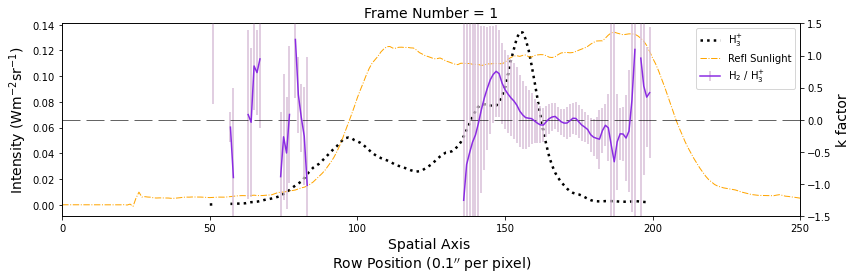

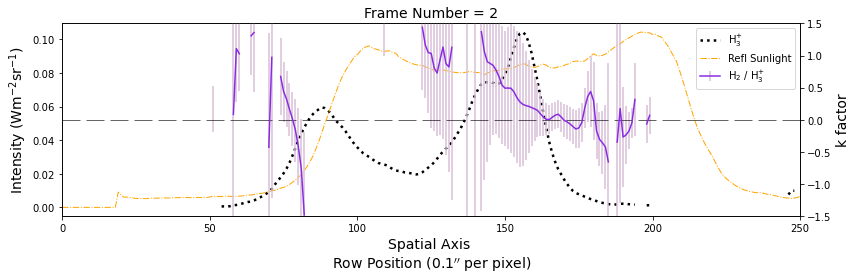

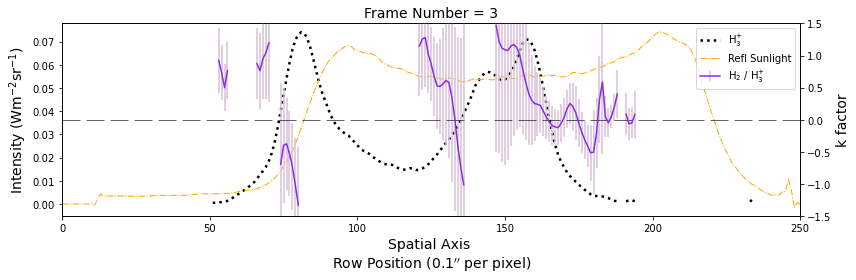

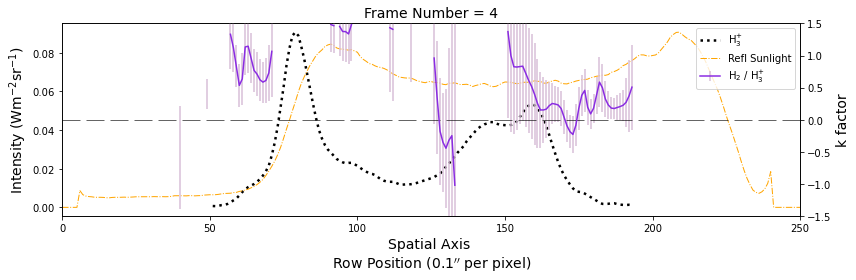

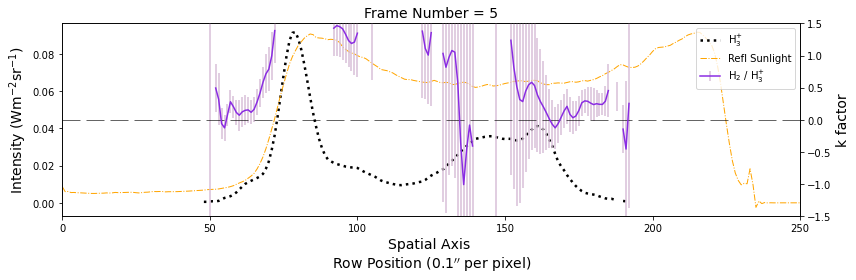

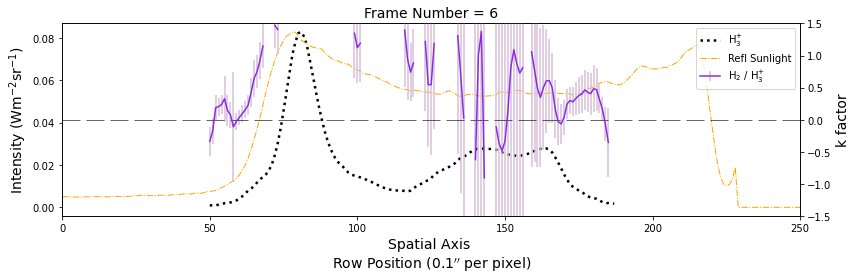

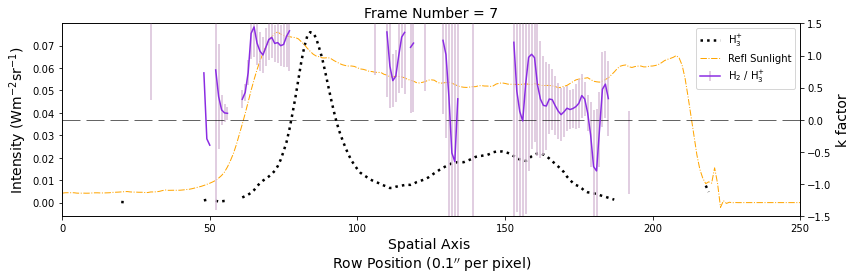

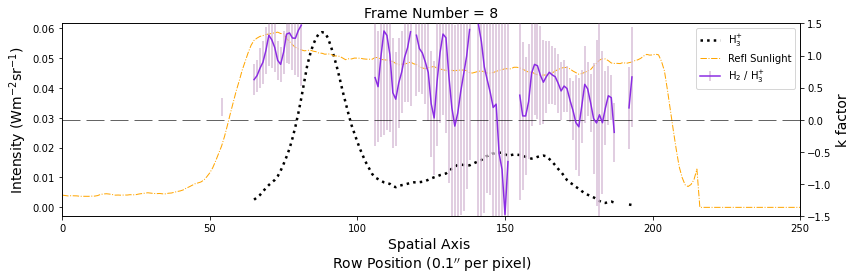

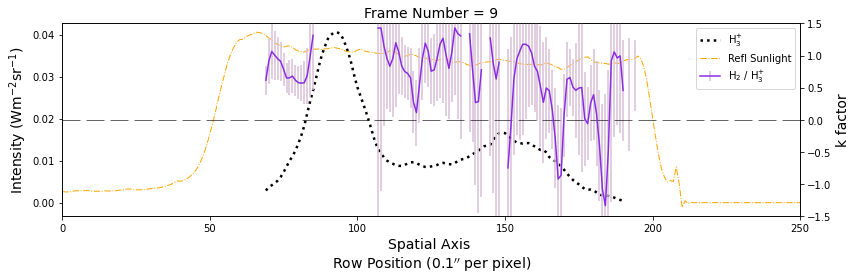

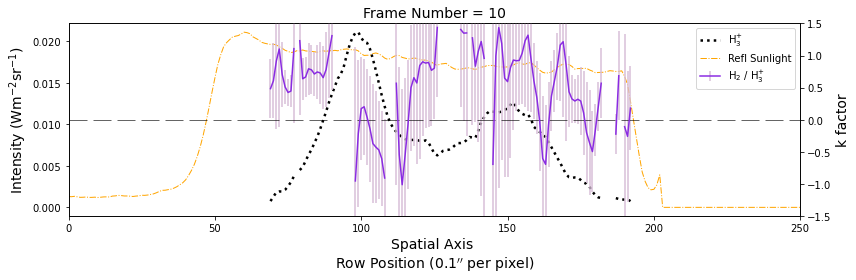

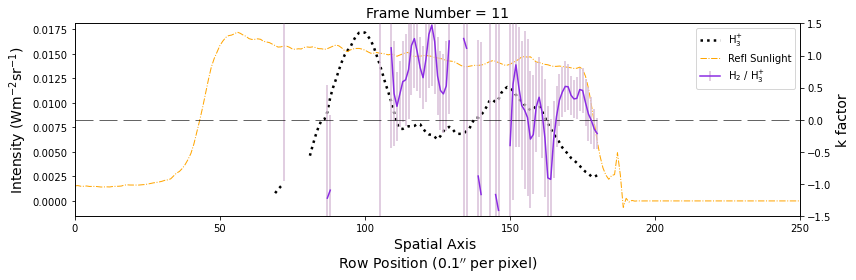

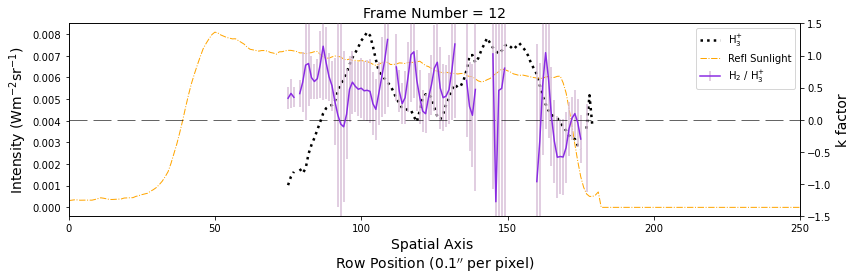

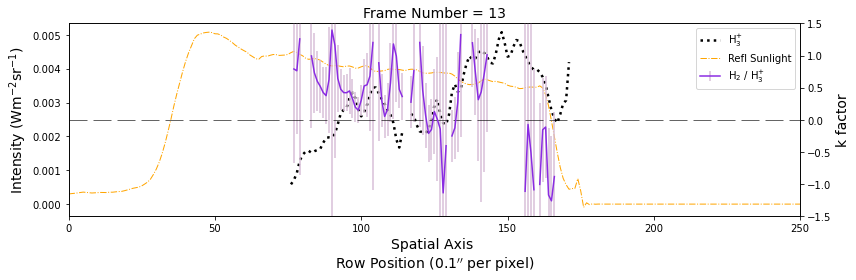

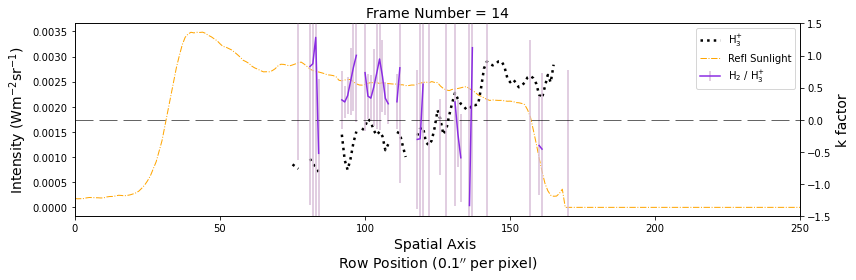

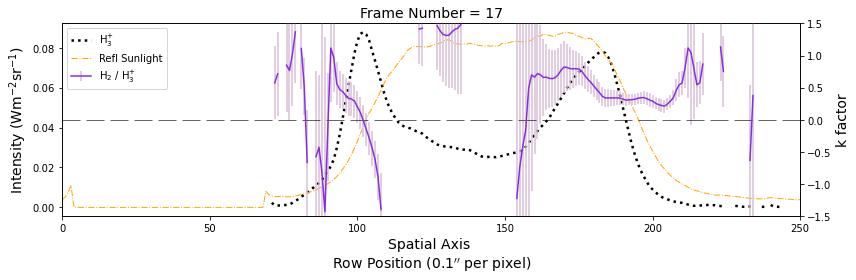

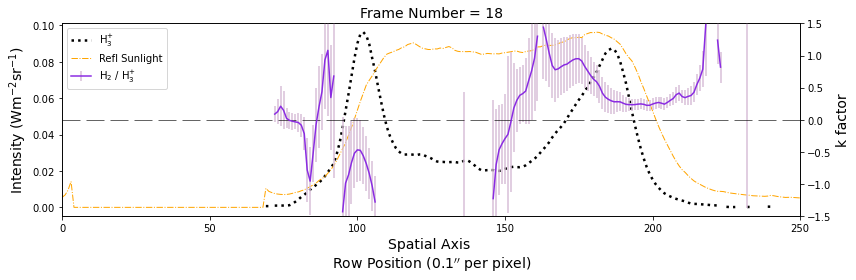

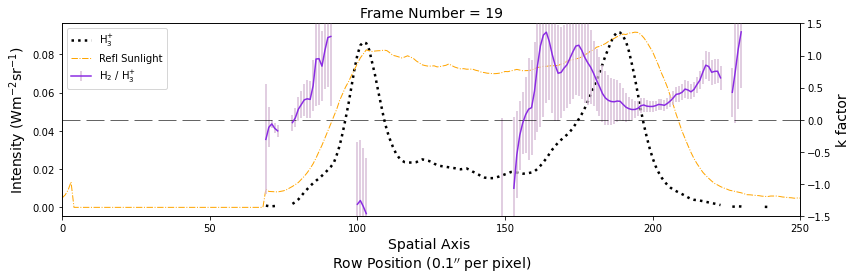

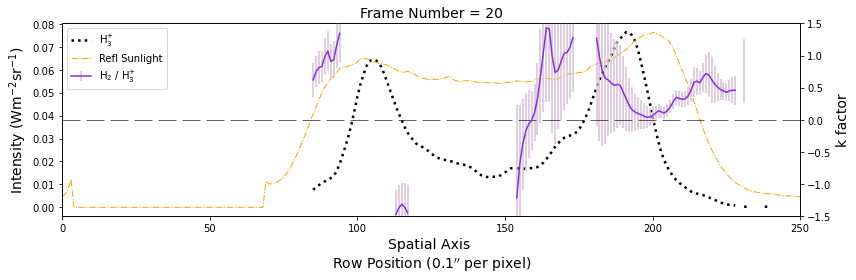

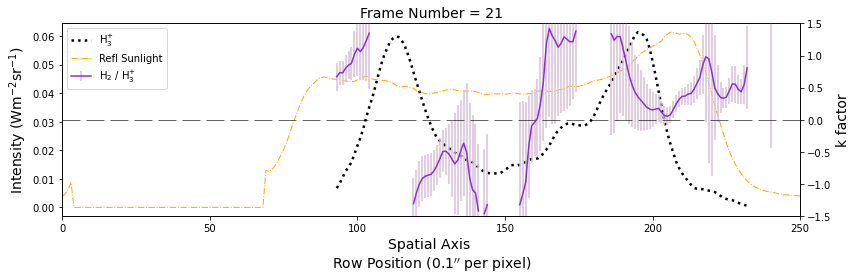

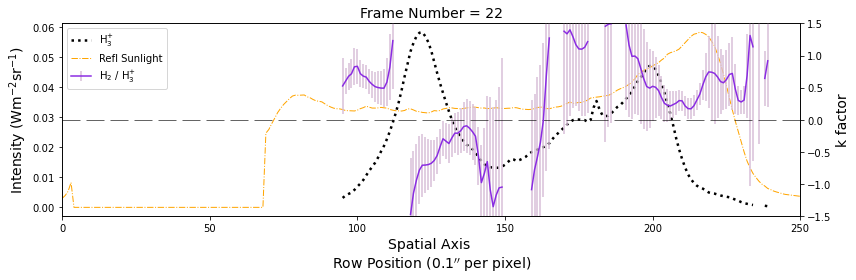

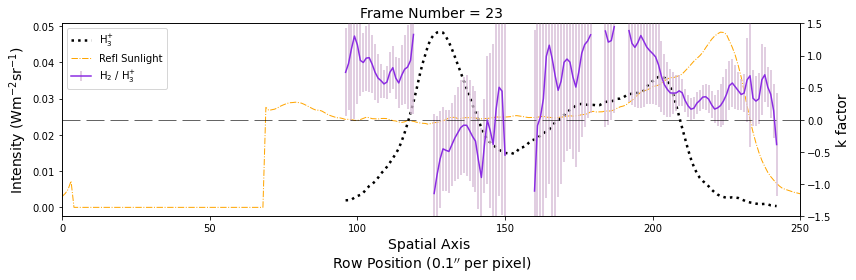

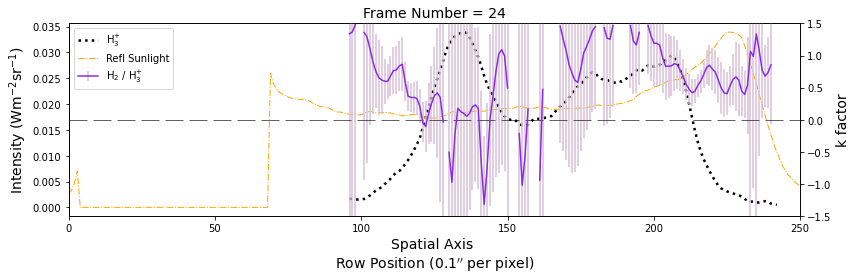

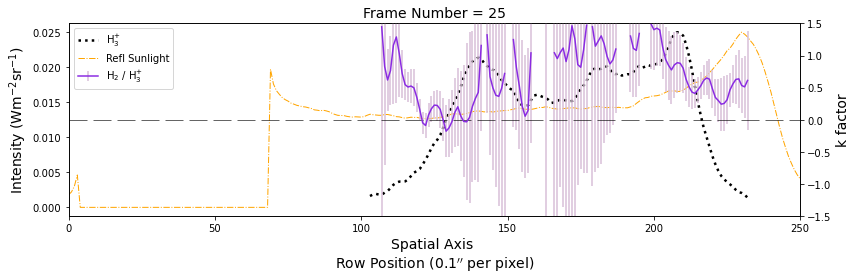

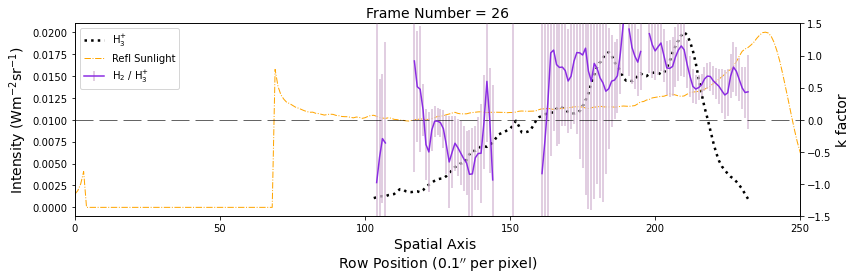

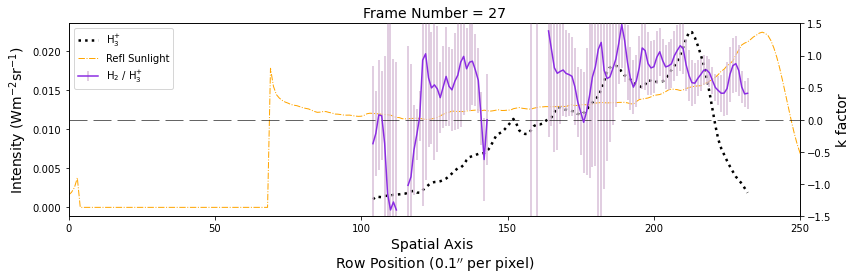

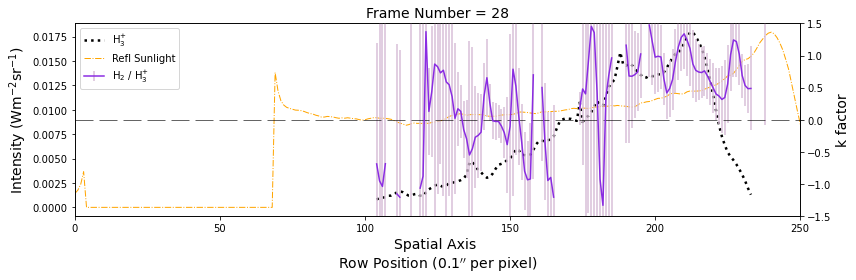

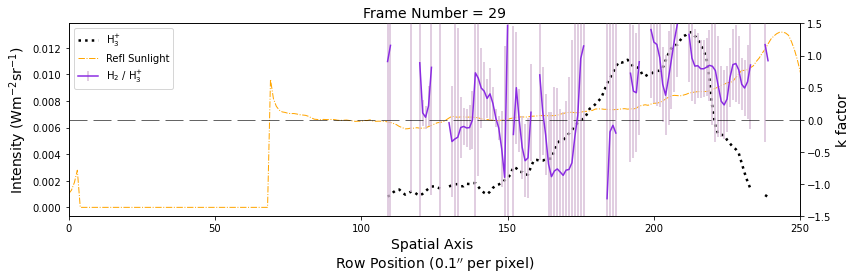

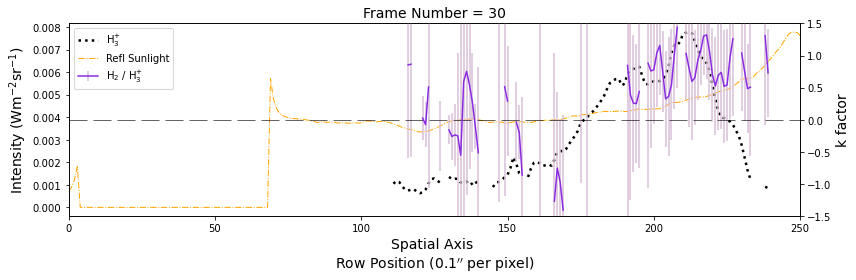

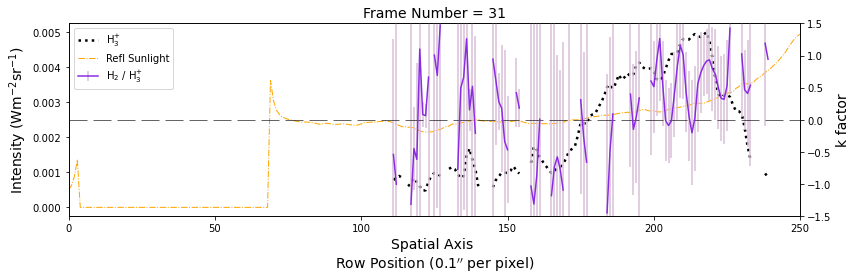

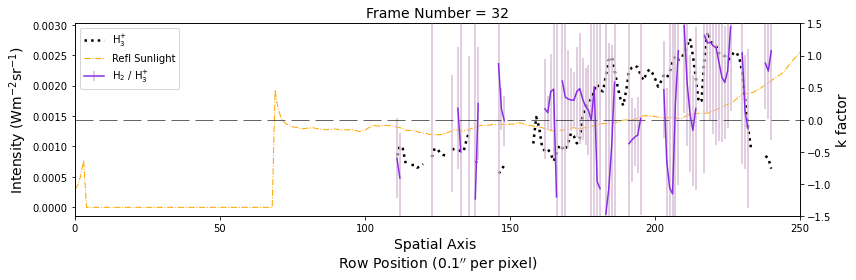

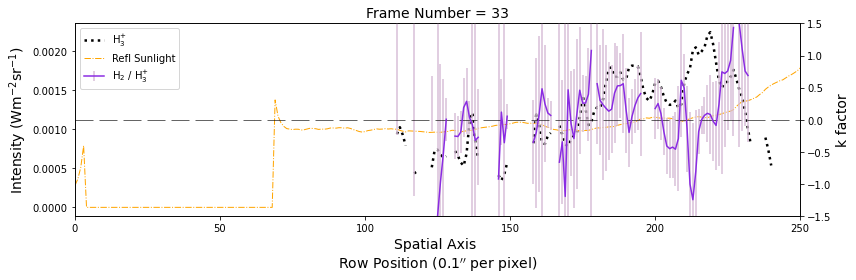

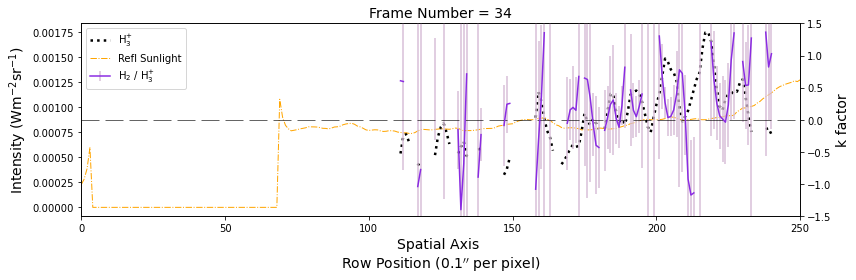

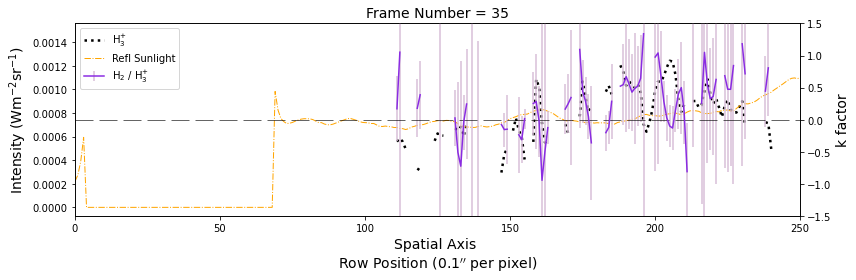

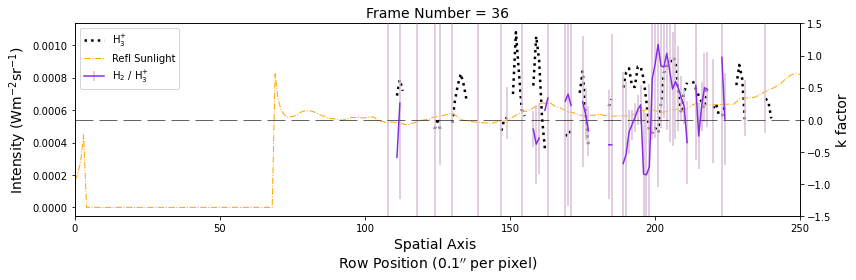

In [7]:
d2 = a2 / b2
d2[d2 > 1.5] = np.nan
d2[d2 < -1.5] = np.nan

errd2 = d2 * np.sqrt((h2_verr / a2)**2 + (h3p_verr / b2)**2)

for i in range(len(h3p_vprf)):
    if i not in (0,15,16,37):  
        xnew = np.linspace(0,299,300)
        int2 = (ref_sun/np.nanmax(ref_sun[i])*np.nanmax(h3p_int[i]))
        
        fig, ax = plt.subplots(figsize = (12, 4))
        plt.title('Frame Number = '+ str(i), fontsize=14)
        
        ax2 = ax.twinx()
        ax.plot(xnew, h3p_int[i], color='k', ls=':', label='H$_3^{+}$', lw=2.5)
        ax.plot(xnew, int2[i], color='orange', ls='-.', label='Refl Sunlight', lw=1)
#         ax2.errorbar(xnew, a2[i], yerr=h2_verr[i], color='red', ecolor='lightsalmon', label='H$_2$')
#         ax2.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='blue', ecolor='lightblue', label='H$_3^{+}$')
        ax2.errorbar(xnew, d2[i], yerr=errd2[i], color='blueviolet', ecolor='thistle', label='H$_2$ / H$_3^{+}$')
        
        # giving labels to the axises
        ax.set_xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
        ax.set_ylabel('Intensity (Wm$^{-2}$sr$^{-1}$)', fontsize=14)

        # secondary y-axis label
        ax2.set_ylabel('k factor', fontsize=14)
        plt.axhline(y=0, xmin=0, xmax=250, color='black', ls='dashed', dashes=(30, 10), lw=0.6)
        plt.xlim(0,250)
        plt.ylim(-1.5,1.5)
        
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc=0)
        
        plt.tight_layout()
#         plt.savefig(imgpath + '/h2_h3p_k_fr_' +str(i), dpi=400, bbox_inches='tight', facecolor='white')

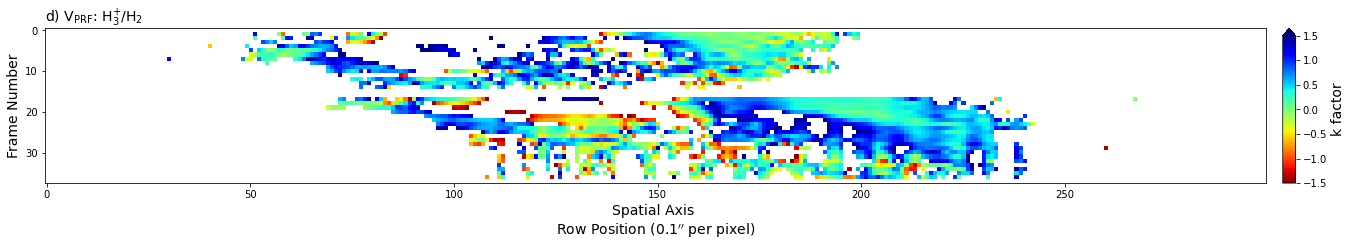

In [35]:
fig = plt.figure(figsize=(24,12), tight_layout=True)

fig.add_subplot(411)
plt.imshow(d2, cmap='jet_r', vmin=-1.5, vmax=1.5)
plt.xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
plt.ylabel('Frame Number', fontsize=14)
plt.title('d) V$_{\mathrm{PRF}}$: H$_3^{+}$/H$_2$', loc='left', fontsize=14)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='k factor',size=14)

c3 = c2 + 0
c_min = c2 - errc2
c_max = c2 + errc2
c_max_t = c3/c_max
c_min_t = c3/c_min
c_max_t[c_max_t <0] = 0
c_min_t[c_min_t <0] = 0
m3 = c_max_t * c_min_t

m3[m3 > 0] = 1

d3 = c3 * m3
d3a = c_min * m3
d3b = c_max * m3
# c3[d3 > 0] = c_min
# c3[d3 < 0] = c_max

plt.figure(figsize=(20,4))
plt.imshow(c_max_t, vmin=0, vmax=1)
plt.colorbar()

plt.figure(figsize=(20,4))
plt.imshow(c_min_t, vmin=0, vmax=1)
plt.colorbar()
# m3[:] = 0
# m3[c_max_t>0 and c_min_t>0] = c3[c_max_t>0 and c_min_t>0]
# c3[c_min < 0]=0

# c3[c3 > 0] = c_min

# for i in range(len(h3p_vprf)):
for i in range(2):
    if i not in (0,15,16,37):  
        xnew = np.linspace(0,299,300)
#         int2 = (h3p_int/np.nanmax(h3p_int[i])*7.8-3.9)
        
        fig, ax = plt.subplots(figsize = (12, 4))
        plt.title('Frame Number = '+ str(i), fontsize=14)
        
        ax2 = ax.twinx()
#         ax.plot(xnew, h3p_int[i], color='k', ls=':', label='H$_3^{+}$', lw=2)
#         ax2.errorbar(xnew, a2[i], yerr=h2_verr[i], color='red', ecolor='lightsalmon', label='H$_2$')
#         ax2.errorbar(xnew, b2[i], yerr=h3p_verr[i], color='blue', ecolor='lightblue', label='H$_3^{+}$')
#         ax2.errorbar(xnew, d3[i], yerr=errc2[i], color='green', ecolor='lightgreen', label='H$_3^{+}$ - H$_2$')
#         ax.plot(xnew, c3[i]/c_min[i], color='gold', ls='-', label='c3/c_min', lw=2)
#         ax.plot(xnew, c3[i]/c_max[i], color='blue', ls='-', label='c3/c_max', lw=2)
        ax.plot(xnew, d3[i], color='blue', ls='-', label='d3', lw=2)
        
        # giving labels to the axises
        ax.set_xlabel('Spatial Axis \nRow Position (0.1$^{\prime\prime}$ per pixel)', fontsize=14)
        ax.set_ylabel('Intensity (Wm$^{-2}$sr$^{-1}$)', fontsize=14)
        ax.set_ylim(-2,2)

        # secondary y-axis label
        ax2.set_ylabel('V$_{\mathrm{PRF}}$ (km/s)', fontsize=14)
        plt.axhline(y=0, xmin=0, xmax=250, color='black', ls='dashed', dashes=(30, 10), lw=0.6)
        plt.xlim(0,250)
        plt.ylim(-4,4)
        
        lines, labels = ax.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc=0)
        
        plt.tight_layout()
#         plt.savefig(imgpath + '/h2_h3p_int_vel_compare_fr_' +str(i), dpi=400, bbox_inches='tight', facecolor='white')